# Trabajo Práctico 1 - Organización de Datos
## Análisis exploratorio de datos de TROCAFONE
### Facultad de Ingeniería de la Universidad de Buenos Aires
### 95-58: Organización de Datos - 2do Cuat. 2018

#### Integrantes: Gonzalo Diz,  Ariel Windey, Gabriel Robles y Matías



## Análisis Exploratorio sobre el set de datos

En este apartado se pretende lograr un entendimiento básico de los datos con los que se cuenta y se va a trabajar. Exploraremos los datos sin (aún) hacerse preguntas sobre los mismos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
sns.set(style="whitegrid") # seteando tipo de grid en seaborn
pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 51)

# Carga del set de datos
df = pd.read_csv('./data/events.csv')

Tomamos 10 muestras de los datos, simplemente para ver cómo vienen.

In [2]:
df.sample(10)

,timestamp,event,person,url,sku,model,condition,storage,color,skus,search_term,staticpage,campaign_source,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
542088,2018-06-13 18:04:48,brand listing,8b2563da,NaN,NaN,NaN,NaN,NaN,NaN,"4020,1614,4033,10982,3985,3853,12690,4153",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
354427,2018-06-13 21:25:14,viewed product,5cc35ca2,NaN,"10,140.00",iPhone 7 Plus,Bom,32GB,Preto Matte,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
706494,2018-05-15 14:55:22,viewed product,b606f178,NaN,"4,981.00",Motorola Moto G3 4G,Excelente,16GB,Branco Azul Navy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20864,2018-05-22 16:43:31,viewed product,0588f9d9,NaN,"8,994.00",iPhone 6S,Excelente,32GB,Ouro Rosa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195458,2018-05-23 17:01:11,viewed product,336df107,NaN,"3,241.00",LG G3 Beat D724,Excelente,8GB,Branco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
445947,2018-04-30 19:49:32,viewed product,73a0172d,NaN,"8,498.00",Samsung Galaxy S7,Muito Bom,32GB,Rosa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
240486,2018-01-16 10:43:05,viewed product,3eb8d8c4,NaN,"2,833.00",iPhone 6,Bom,64GB,Cinza espacial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76006,2018-06-01 22:52:51,viewed product,151f9120,NaN,"10,323.00",iPhone 7,Muito Bom,32GB,Ouro Rosa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
324903,2018-03-29 21:50:48,viewed product,55d9fd71,NaN,"9,259.00",Samsung Galaxy On 7,Muito Bom,16GB,Dourado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
856217,2018-04-27 00:58:13,search engine hit,d9f5295c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(1011288, 23)

El dataset cuenta con 1011288 datos (observaciones) con 23 atributos

#### Como primera observación, podemos decir que hay una gran cantidad de valores nulos: parecen predominar en el set de datos.


Se chequeará el tipo de dato asignado a los daots importados.
La función *load_csv()* se utilizó sin el parámetro que indica el tipo de dato de cada atributo, por lo que es natural que sean del tipo *object*.

In [4]:
df.dtypes

timestamp                   object
event                       object
person                      object
url                         object
sku                         object
model                       object
condition                   object
storage                     object
color                       object
skus                        object
search_term                 object
staticpage                  object
campaign_source             object
search_engine               object
channel                     object
new_vs_returning            object
city                        object
region                      object
country                     object
device_type                 object
screen_resolution           object
operating_system_version    object
browser_version             object
dtype: object

Creemos importante transformar el atributo *timestamp* dado que como object no es amigable de trabajar. Convirtiéndolo a tipo *datetime* se podrán aprovechar features de pandas sobre este tipo de datos.

Además, los siguientes campos pueden ser categóricos

In [5]:
df['condition'].value_counts()

Bom                   243014
Excelente             152977
Muito Bom             151359
Bom - Sem Touch ID     15295
Novo                    1191
Name: condition, dtype: int64

In [6]:
df['channel'].value_counts()

Paid        44193
Direct      18522
Organic     12348
Referral    11384
Social        846
Email          76
Unknown         9
Name: channel, dtype: int64

In [7]:
df['new_vs_returning'].value_counts()

Returning    60480
New          26898
Name: new_vs_returning, dtype: int64

In [8]:
df['country'].value_counts().head()

Brazil           84308
Unknown           2313
United States      465
Argentina           94
Canada              35
Name: country, dtype: int64

In [9]:
df['device_type'].value_counts().head()

Smartphone    44239
Computer      41790
Tablet         1234
Unknown         115
Name: device_type, dtype: int64

Por lo tanto se harán las siguientes transformaciones de datos:

In [10]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.condition = pd.Categorical(df.condition)
df.channel = pd.Categorical(df.channel)
df.new_vs_returning = pd.Categorical(df.new_vs_returning)
#df.country = pd.Categorical(df.country)
#df.device_type = pd.Categorical(df.device_type)

In [11]:
df.dtypes

timestamp                   datetime64[ns]
event                               object
person                              object
url                                 object
sku                                 object
model                               object
condition                         category
storage                             object
color                               object
skus                                object
search_term                         object
staticpage                          object
campaign_source                     object
search_engine                       object
channel                           category
new_vs_returning                  category
city                                object
region                              object
country                             object
device_type                         object
screen_resolution                   object
operating_system_version            object
browser_version                     object
dtype: obje

#### Nos hacemos las siguientes preguntas:

1. ¿En qué proporción son nulos los atributos?
2. ¿Existe alguna correlación entre atributos nulos y tipos de evento?
3. ¿Todos los nulos que existen obedecen a la regla de "no todos los atributos se corresponden con todos los eventos", o son por dato faltante?
4. ¿Cual es la proporción entre distintos tipos de eventos en este set de datos?
5. ¿Cual es el rango temporal de los datos?

#### 1. ¿En qué proporción son nulos los atributos?

In [12]:
atributes_null = (df.isna().sum().sort_values() / df.shape[0]) * 100

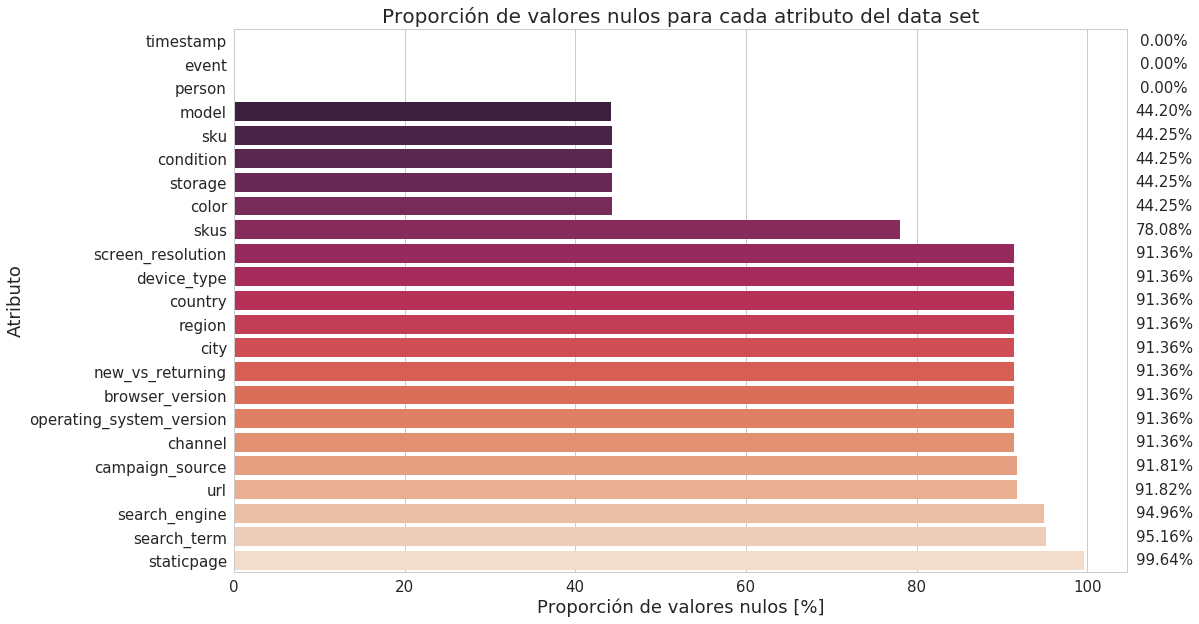

In [175]:
# sns.barplot(x=df_null.index, y=df_null.values, palette="rocket", orient="h")
# Create barplot 
ax = sns.barplot(y=atributes_null.index, x=atributes_null.values, palette='rocket', orient='h')
# Annotate every single Bar with its value, based on it's width 
fig = plt.gcf()
fig.set_size_inches( 16, 10)

plt.title("Proporción de valores nulos para cada atributo del data set", fontsize=20)
ax.set_xlabel('Proporción de valores nulos [%]', fontsize=18)
ax.set_ylabel('Atributo', fontsize=18)
plt.xticks(size = 15)
plt.yticks(size = 15)

for p in ax.patches:
    width = p.get_width()
    plt.text(p.get_x()+109, p.get_y()+0.5*p.get_height(),
             '{:1.2f}'.format(width)+'%',
             ha='center', va='center', fontsize=15)

In [14]:
total_null = {'null' : atributes_null.mean(), 'non-null' : 100-atributes_null.mean()}

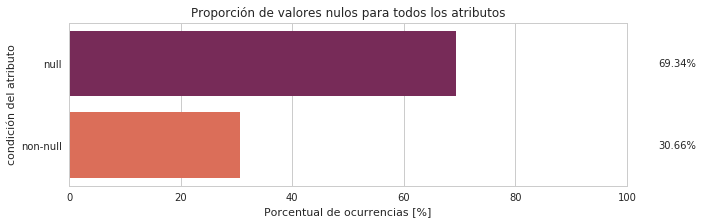

In [15]:
ax2 = sns.barplot(y=pd.Series(total_null).index, x=pd.Series(total_null).values, palette='rocket', orient='h')

fig = plt.gcf()
fig.set_size_inches( 10, 3)
ax2.axes.set_xlim(0,100)

plt.title("Proporción de valores nulos para todos los atributos")
ax2.set(xlabel='Porcentual de ocurrencias [%]', ylabel='condición del atributo')

for p in ax2.patches:
    width = p.get_width()
    plt.text(p.get_x()+109, p.get_y()+0.5*p.get_height(),
             '{:1.2f}'.format(width)+'%',
             ha='center', va='center')

Como puede observarse, hay tres atributos que nunca son nulos: timestamp, event y person.
Además, existen grupos de atributos con una proporción idéntica de valores nulos.

#### 2. ¿Existe alguna correlación entre atributos nulos y tipos de evento?

Todo indica que sí, el enunciado aclara:

>"Algo a tener en cuenta es que no todos los datos descritos en las columnas corresponde a todos los tipos de eventos."

Lo que intentaremos responder entonces es ¿Qué atributo se corresponde con qué tipo de evento?

Para responder esto agruparemos el data frame por tipo de evento y setearemos el mismo como índice de fila [1]. Luego, aplicaremos una función lambda para sumar la cantidad de observaciones no nulas [2].
Por último, normalizaremos cada suma de apariciones no nulas, dividéndola por el total de apariciones de ese evento, que no es otra cosa que la cantidad de atributos 'timestamp' no nulos (se vió que este atributo nunca es nulo) [3].

In [16]:
# [1]
df_event_index = df.set_index('event')
# [2]
event_vs_null_atr = df_event_index.groupby('event').apply(lambda x=0: x.notnull().sum())
# [3]
n_event_vs_null_atr = event_vs_null_atr.apply(lambda x: (x/x.max()) * 100, axis=1)
n_event_vs_null_atr

,timestamp,person,url,sku,model,condition,storage,color,skus,search_term,staticpage,campaign_source,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
event,,,,,,,,,,,,,,,,,,,,,,
ad campaign hit,100.00,100.00,99.91,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,99.96,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
brand listing,100.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,99.68,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
checkout,100.00,100.00,0.00,100.00,99.99,99.99,99.99,99.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
conversion,100.00,100.00,0.00,100.00,100.00,100.00,100.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
generic listing,100.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,99.83,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
lead,100.00,100.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
search engine hit,100.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
searched products,100.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,99.79,87.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
staticpage,100.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


[Text(17.2,0.5,'condición del atributo'),
 Text(0.5,17.2,'Porcentual de apariciones [%]')]

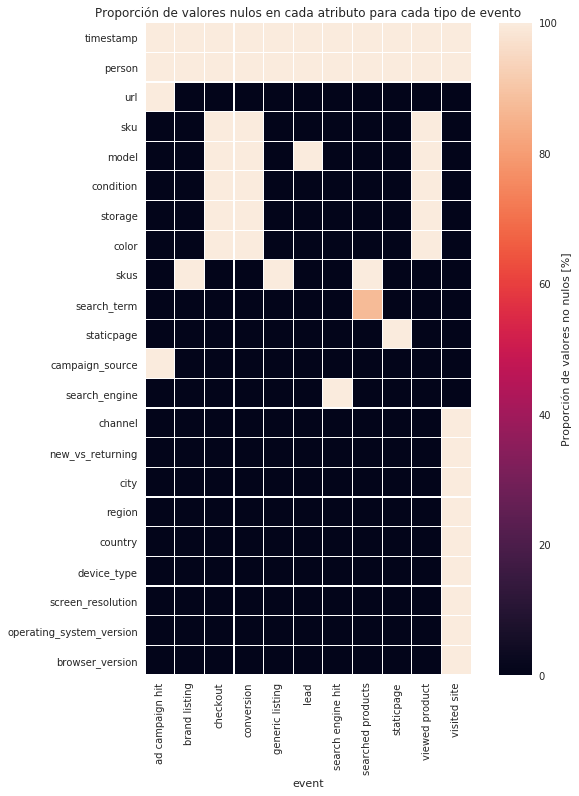

In [17]:
hmp = sns.heatmap(n_event_vs_null_atr.transpose(), linecolor='white', xticklabels=True, yticklabels=True, linewidths=0.2, square=True, cbar_kws={'label': 'Proporción de valores no nulos [%]'})
fig = plt.gcf()
fig.set_size_inches(10, 12)

plt.title("Proporción de valores nulos en cada atributo para cada tipo de evento")
ax2.set(xlabel='Porcentual de apariciones [%]', ylabel='condición del atributo')

En el anterior gráfico se respode la pregunta de ¿Qué atributo se corresponde con qué tipo de evento?

Haciendo una lectura horizontal, puede observarse que:

1. Puede observarse que los atributos timestamp y person son comunes a todos los eventos
2. El atributo url sólo corresponde al evento ad_campaign_hit
3. Los atributos sku, condition, storage y color son compartido entre los eventos checkout, conversion y viewed product.
4. El atributo model es compartido entre checkout, conversion, lead y viewed product.
5. El atributo skus le corresponde a los eventos brand listing, generic listinc y searched products
6. El atributo search tearm sólamente le corresponde al evento searched products. Cabe destacar que el mismo no aparece como valor no nulo en un 100% de las observaciones.
7. El atributo static page le corresponde al evento staticpage únicamente.
8. El atriuto campaign source le corresponde únicamente al evento ad campaign hit.
9. El atriuto search engine le corresponde únicamente al evento sarch engine hit.
10. Los atributos channel, new_vs_returning, city, region, country, device_type, screen resolution, operating system version, y browser version le corresponden únicamente al evento visited site.

####  3. ¿Todos los nulos que existen obedecen a la regla de "no todos los atributos se corresponden con todos los eventos", o son por dato faltante?

En el anterior gráfico puede observarse claramente que la regla de "no todos los atributos se corresponden con todos los eventos" se cumple. Esto explica que haya tanta cantidad de atributos nulos. Sin embargo, existen atributos que se corresponden a un tipo de evento que tienen una pequeña proporción de observaciones nulas.

El caso mas notorio es para el evento 'searched products' con su atributo 'search term' con un aproximado de 13% de oservaciones nulas. Dicho evento significa "El usuario realiza una búsqueda de productos en la interfaz de búsqueda del site." por lo que podemos asumir que el usuario hizo una búsqueda sin un string particular.

El resto de atriutos nulos para ciertos tipos de eventos puede ser despreciable, ya que no superan el 0,1%.

#### ¿Cual es la proporción entre distintos tipos de eventos en este set de datos?

In [18]:
events = df['event'].value_counts()
events

viewed product       528931
brand listing         98635
visited site          87378
ad campaign hit       82827
generic listing       67534
searched products     56073
search engine hit     50957
checkout              33735
staticpage             3598
conversion             1172
lead                    448
Name: event, dtype: int64

Rápidamente puede observarse que el evento predominante es 'viewed product'. Primero compararemos este evento contra el resto.

In [19]:
events_index = ['viewed product', 'others']
events_vp_others = pd.Series(events.groupby(events.index != 'viewed product').sum().values, index=['viewed product', 'otros'])

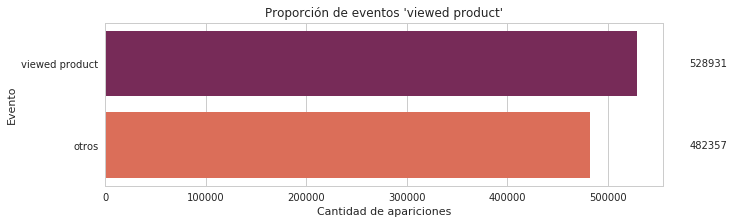

In [20]:
ax2 = sns.barplot(y=events_vp_others.index, x=events_vp_others.values, palette='rocket', orient='h')

fig = plt.gcf()
fig.set_size_inches( 10, 3)
#ax2.axes.set_xlim(0,100)

plt.title("Proporción de eventos 'viewed product'")
ax2.set(xlabel='Cantidad de apariciones', ylabel='Evento')

for p in ax2.patches:
    width = p.get_width()
    plt.text(p.get_x()+600000, p.get_y()+0.5*p.get_height(),
             '{:1.0f}'.format(width),
             ha='center', va='center')

Luego compararemos todos los eventos que no son 'viewed product'

[Text(0,0.5,'Evento'), Text(0.5,0,'Proporción de ocurrecias [%]')]

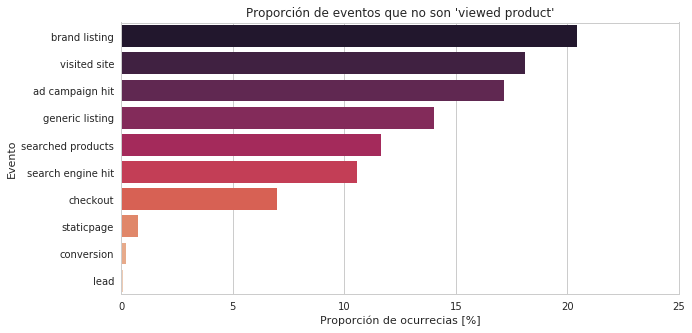

In [21]:
event_others = events[events.index != 'viewed product']
event_others = event_others / event_others.sum() * 100

ax2 = sns.barplot(y=event_others.index, x=event_others.values, palette='rocket', orient='h')

fig = plt.gcf()
fig.set_size_inches( 10, 5)
ax2.axes.set_xlim(0,25)

plt.title("Proporción de eventos que no son 'viewed product'")
ax2.set(xlabel='Proporción de ocurrecias [%]', ylabel='Evento')

#### 5. ¿Cual es el rango temporal de los datos?

In [22]:
df_c = df.copy()
df_c["timestamp"] = df['timestamp'].dt.date
pivot = df_c.groupby(['event', 'timestamp']).agg({'person' : 'count'})
pivot = pivot.pivot_table(index='timestamp', columns='event', values='person')

Text(0.5,1,'Mapa de calor para los eventos (*) a lo largo del dataset')

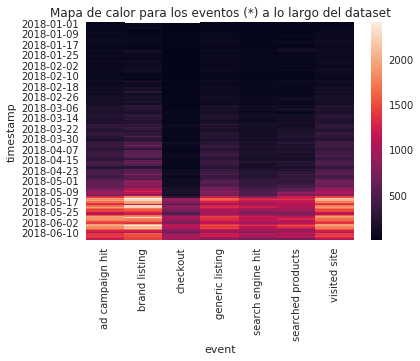

In [23]:
hp = sns.heatmap(pivot.drop(['viewed product', 'conversion', 'lead', 'staticpage'], axis=1))
plt.title("Mapa de calor para los eventos (*) a lo largo del dataset")

(*) Para este gráfico se descartartó el eventos 'viewed product' (por ser altamente predominante) y los eventos 'conversion', 'lead' y 'staticpage' por tener una presencia muy inferior al resto.

Pude observarse que existen datos a partir de 2018 hasta mediados del mes de Junio. Además, la cantidad de eventos se disparó hasta tres veces a partir de mediados de mayo.

## Análisis sore S.O. y dispositivos


Queremos ver en que tipo de dispositivo acceden por primera vez los usuarios

In [24]:
# Primero agregamos unas columnas sobre el timestamp
df['hour'] = df['timestamp'].dt.hour
df['month'] = df['timestamp'].dt.month
df['week_year'] = df['timestamp'].dt.weekofyear
df['week'] = df['timestamp'].dt.week
df['year'] = df['timestamp'].dt.year
df['day_week'] = df['timestamp'].dt.dayofweek
df['month_day'] = df['timestamp'].dt.day
df['is_weekend'] = (df.day_week == 5) | (df.day_week == 6)

events_count_per_week = df['week_year'].value_counts()
events_count_per_week.sort_values(axis=0, ascending=True)
events_count_per_week = events_count_per_week.to_frame()
events_count_per_week['week'] = events_count_per_week.index
events_count_per_week.sort_values(by='week', inplace=True)
print(events_count_per_week)

    week_year  week
1        2710     1
2        4497     2
3        4918     3
4        4922     4
5        5086     5
6        4989     6
7        6398     7
8        8822     8
9       10310     9
10      13879    10
11      16893    11
12      21607    12
13      21382    13
14      26487    14
15      28613    15
16      27712    16
17      38581    17
18      51040    18
19      72658    19
20     146430    20
21     124961    21
22     142782    22
23     140573    23
24      85038    24


In [25]:
visited_site = df.loc[df['event'] == 'visited site' , : ]
new_vs_returning_count = visited_site['new_vs_returning'].value_counts()
news_visited_site = visited_site.loc[visited_site['new_vs_returning'] == 'New' , : ]
returning_visited_site = visited_site.loc[visited_site['new_vs_returning'] == 'Returning' , : ]
events_count_per_week = events_count_per_week.loc[events_count_per_week['week'] != 24]
news_visited_site.head()


,timestamp,event,person,url,sku,model,condition,storage,color,skus,search_term,staticpage,campaign_source,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version,hour,month,week_year,week,year,day_week,month_day,is_weekend
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39,23,5,22,22,2018,3,31,False
5,2018-05-29 13:29:26,visited site,0006a21a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paid,New,Rio de Janeiro,Rio de Janeiro,Brazil,Smartphone,360x640,Android 5.1.1,Android 5.1,13,5,22,22,2018,1,29,False
9,2018-04-09 20:12:31,visited site,000a54b2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paid,New,Rio de Janeiro,Rio de Janeiro,Brazil,Computer,1920x1080,Windows 10,Chrome 65.0,20,4,15,15,2018,0,9,False
45,2018-04-06 05:12:05,visited site,00184bf9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Organic,New,Ribeirão Preto,Sao Paulo,Brazil,Computer,1366x768,Windows 10,Chrome 65.0,5,4,14,14,2018,4,6,False
96,2018-05-17 00:08:56,visited site,0019c395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paid,New,Unknown,Unknown,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 66.0,0,5,20,20,2018,3,17,False


Text(0,0.5,'Cantidad')

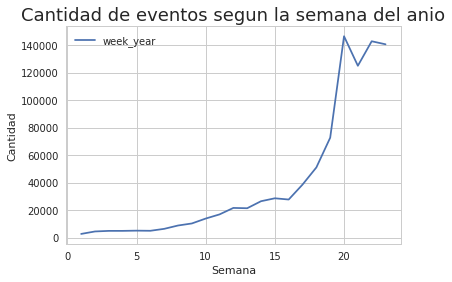

In [26]:
plot_events_per_week = events_count_per_week[['week_year']].plot.line()
plot_events_per_week.set_title("Cantidad de eventos segun la semana del anio", fontsize=18)
plot_events_per_week.set_xlabel("Semana")
plot_events_per_week.set_ylabel("Cantidad")

In [27]:
# Vemos los distintos tipos de accesos por primera vez
news_visited_site['device_type'].value_counts(normalize=True)

Smartphone                   0.53
Computer                     0.45
Tablet                       0.02
Unknown                      0.00
Name: device_type, dtype: float64

In [28]:
# Seleccionamos los eventos de sitio visitado
visited_site = df.loc[df['event'] == 'visited site' , : ]
visited_site.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87378 entries, 1 to 1011284
Data columns (total 31 columns):
timestamp                   87378 non-null datetime64[ns]
event                       87378 non-null object
person                      87378 non-null object
url                         0 non-null object
sku                         0 non-null object
model                       0 non-null object
condition                   0 non-null category
storage                     0 non-null object
color                       0 non-null object
skus                        0 non-null object
search_term                 0 non-null object
staticpage                  0 non-null object
campaign_source             0 non-null object
search_engine               0 non-null object
channel                     87378 non-null category
new_vs_returning            87378 non-null category
city                        87378 non-null object
region                      87378 non-null object
country            

In [29]:
# Vemos cuanta proporcion hay de new y returning
new_vs_returning_count = visited_site['new_vs_returning'].value_counts()
print(new_vs_returning_count)

Returning    60480
New          26898
Name: new_vs_returning, dtype: int64


Text(0,0.5,'Cantidad')

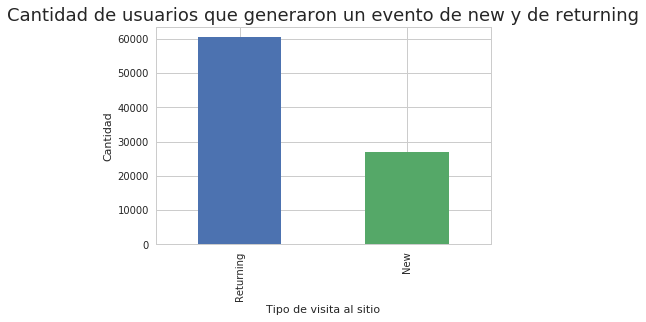

In [30]:
plot_new_vs_returning_counts = new_vs_returning_count.plot.bar()
plot_new_vs_returning_counts.set_title("Cantidad de usuarios que generaron un evento de new y de returning", fontsize=18)
plot_new_vs_returning_counts.set_xlabel("Tipo de visita al sitio")
plot_new_vs_returning_counts.set_ylabel("Cantidad")

In [31]:
# Queremos ver en que tipo de dispositivo acceden por primera vez los usuarios
news_visited_site = visited_site.loc[visited_site['new_vs_returning'] == 'New' , : ]
returning_visited_site = visited_site.loc[visited_site['new_vs_returning'] == 'Returning' , : ]
news_visited_site.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,search_term,staticpage,campaign_source,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version,hour,month,week_year,week,year,day_week,month_day,is_weekend
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39,23,5,22,22,2018,3,31,False
5,2018-05-29 13:29:26,visited site,0006a21a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paid,New,Rio de Janeiro,Rio de Janeiro,Brazil,Smartphone,360x640,Android 5.1.1,Android 5.1,13,5,22,22,2018,1,29,False
9,2018-04-09 20:12:31,visited site,000a54b2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paid,New,Rio de Janeiro,Rio de Janeiro,Brazil,Computer,1920x1080,Windows 10,Chrome 65.0,20,4,15,15,2018,0,9,False
45,2018-04-06 05:12:05,visited site,00184bf9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Organic,New,Ribeirão Preto,Sao Paulo,Brazil,Computer,1366x768,Windows 10,Chrome 65.0,5,4,14,14,2018,4,6,False
96,2018-05-17 00:08:56,visited site,0019c395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paid,New,Unknown,Unknown,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 66.0,0,5,20,20,2018,3,17,False


De aqui podemos observar que la primera vez que acceden los usuarios a trocafone es casi igual de parejo entre computadoras de escritorio y celulares.

Veamos que sucede si vemos el tipo de dispositivo con el que vuelven los usuarios a la plataforma.

In [32]:
# Vemos los distintos tipos de accesos en los eventos de visita
returning_visited_site['device_type'].value_counts(normalize=True)

Smartphone                   0.49
Computer                     0.49
Tablet                       0.01
Unknown                      0.00
Name: device_type, dtype: float64

**Conclusion**: de estos datos inducimos que la experiencia del usuario en la plataforma es igual de buena tanto en mobile como en desktop

In [33]:
visited_site['country'].value_counts()

Brazil                84308
Unknown                2313
United States           465
Argentina                94
Canada                   35
Netherlands              13
France                   13
United Kingdom           12
Mozambique               12
Japan                    11
Poland                    9
French Guiana             8
Italy                     7
Portugal                  7
Romania                   7
Russia                    6
Dominican Republic        6
Guadeloupe                6
Germany                   5
Colombia                  4
Bangladesh                4
Paraguay                  4
Switzerland               3
Angola                    2
India                     2
Morocco                   2
China                     1
South Africa              1
Belize                    1
Philippines               1
Uruguay                   1
Peru                      1
Cape Verde                1
Denmark                   1
Israel                    1
Algeria             

In [34]:
len(visited_site)

87378

In [35]:
visited_site.dropna(axis='columns', inplace=True)

# Categorizamos las regiones geograficamente
visited_site['geo_region'] = np.nan

visited_site.loc[
    (visited_site['region'] == 'Sao Paulo') |
    (visited_site['region'] == 'Rio de Janeiro') |
    (visited_site['region'] == 'Minas Gerais') |
    (visited_site['region'] == 'Espirito Santo'), 
    'geo_region'
] = 'southeast'

visited_site.loc[
    (visited_site['region'] == 'Parana') |
    (visited_site['region'] == 'Rio Grande do Sul') |
    (visited_site['region'] == 'Santa Catarina'), 
    'geo_region'
] = 'south'

visited_site.loc[
    (visited_site['region'] == 'Federal District') |
    (visited_site['region'] == 'Goias') |
    (visited_site['region'] == 'Mato Grosso do Sul') |
    (visited_site['region'] == 'Mato Grosso'), 
    'geo_region'
] = 'center west'

visited_site.loc[
    (visited_site['region'] == 'Bahia') |
    (visited_site['region'] == 'Pernambuco') |
    (visited_site['region'] == 'Ceara') |
    (visited_site['region'] == 'Maranhao') |
    (visited_site['region'] == 'Rio Grande do Norte') |
    (visited_site['region'] == 'Paraíba') |
    (visited_site['region'] == 'Piaui') |
    (visited_site['region'] == 'Alagoas') |
    (visited_site['region'] == 'Sergipe'), 
    'geo_region'
] = 'northeast'

visited_site.loc[
    (visited_site['region'] == 'Para') |
    (visited_site['region'] == 'Amazonas') |
    (visited_site['region'] == 'Tocantins') |
    (visited_site['region'] == 'Amapa') |
    (visited_site['region'] == 'Rondonia') |
    (visited_site['region'] == 'Acre') |
    (visited_site['region'] == 'Roraima'), 
    'geo_region'
] = 'north'

In [36]:
visited_site_brazil = visited_site.loc[visited_site['country'] == 'Brazil']


cities = visited_site_brazil['city'].value_counts()
regions = visited_site_brazil['region'].value_counts()
countries = visited_site_brazil['country'].value_counts()
geo_region = visited_site_brazil['geo_region'].value_counts(normalize=True)
# print regions
# print countries
print(geo_region)
visited_site_brazil['geo_region'].count()


southeast                     0.57
northeast                     0.23
south                         0.09
center west                   0.06
north                         0.04
Name: geo_region, dtype: float64


71930

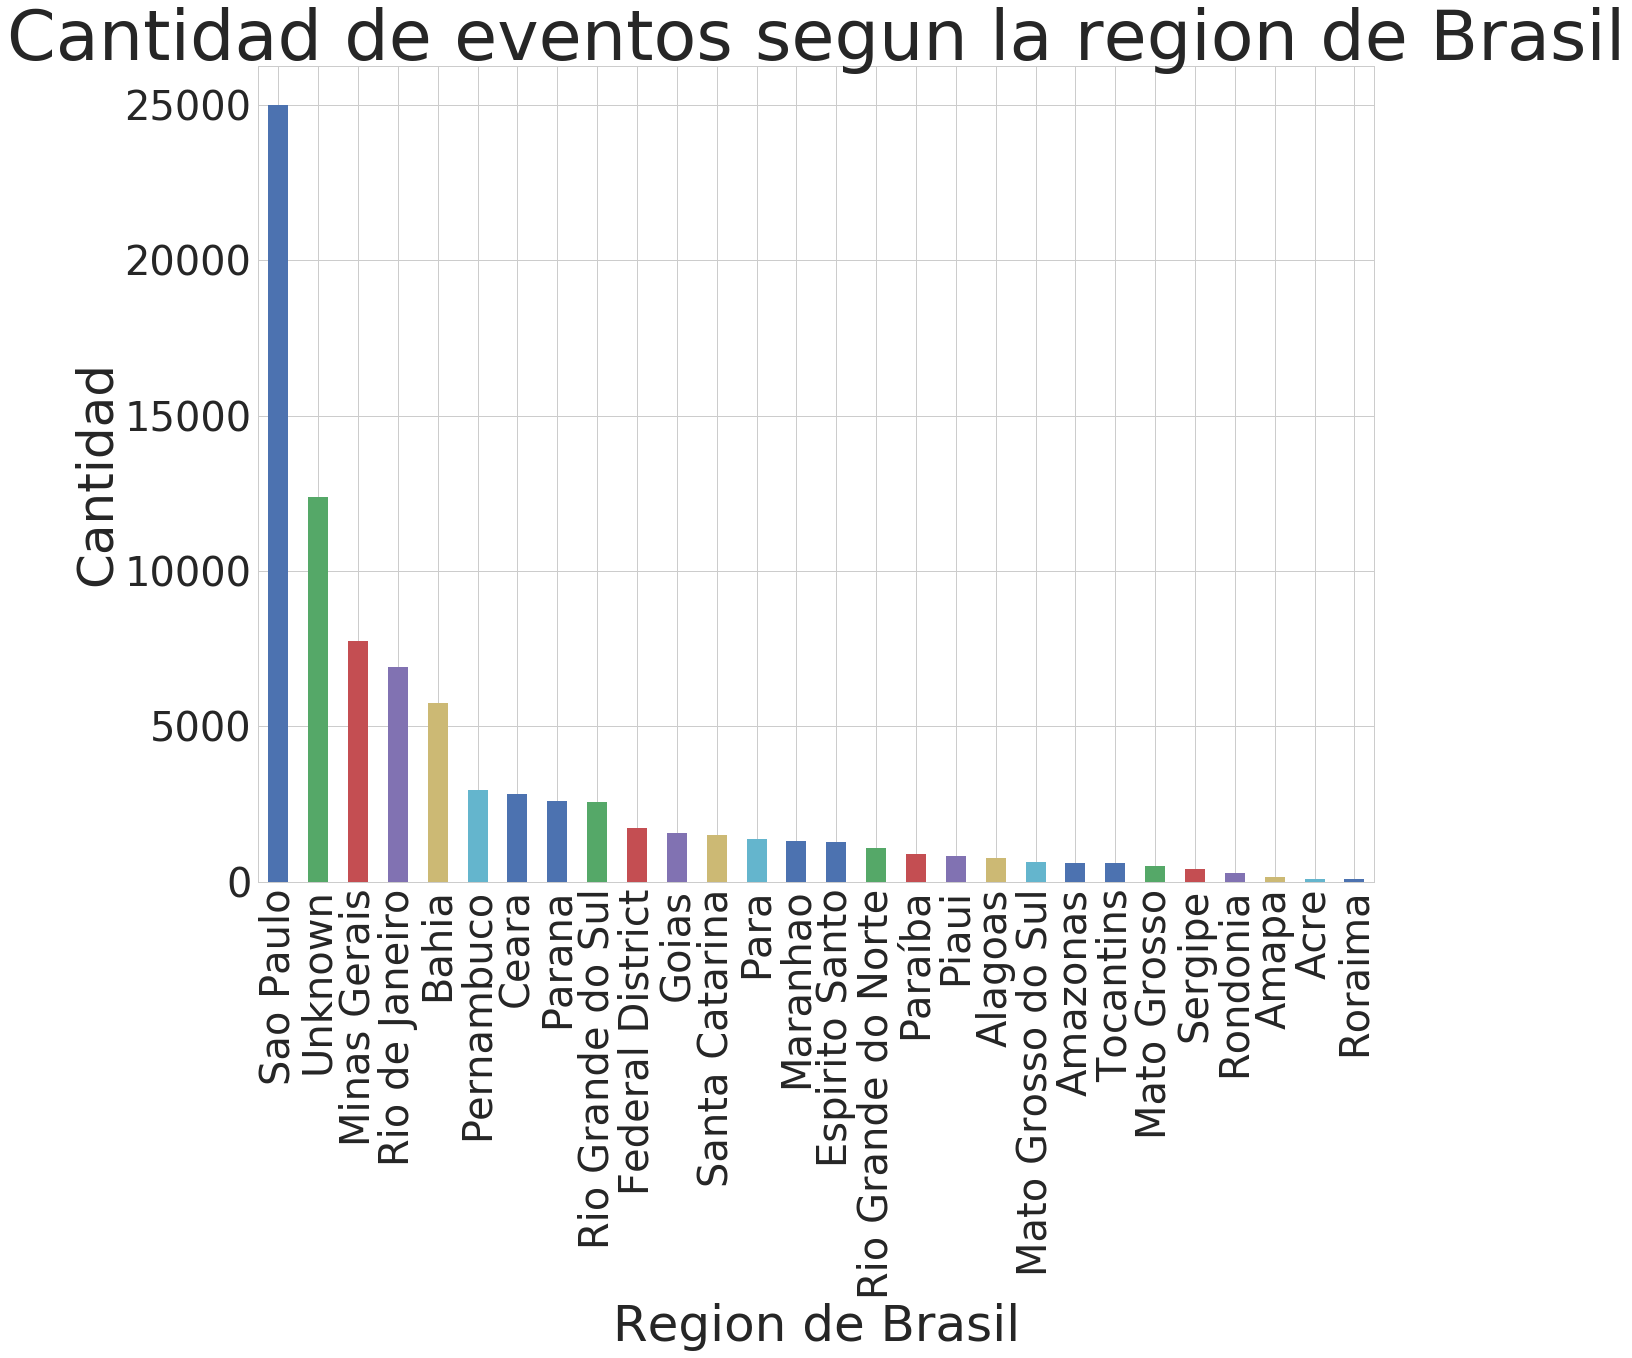

In [37]:
bar_regions_plot = regions.plot.bar(figsize=(20, 15), fontsize=40)
bar_regions_plot.set_title("Cantidad de eventos segun la region de Brasil", fontsize=70)
bar_regions_plot.set_xlabel("Region de Brasil", fontsize=50)
bar_regions_plot.set_ylabel("Cantidad", fontsize=50)
bar_regions_plot.get_figure().savefig('visited_per_region')

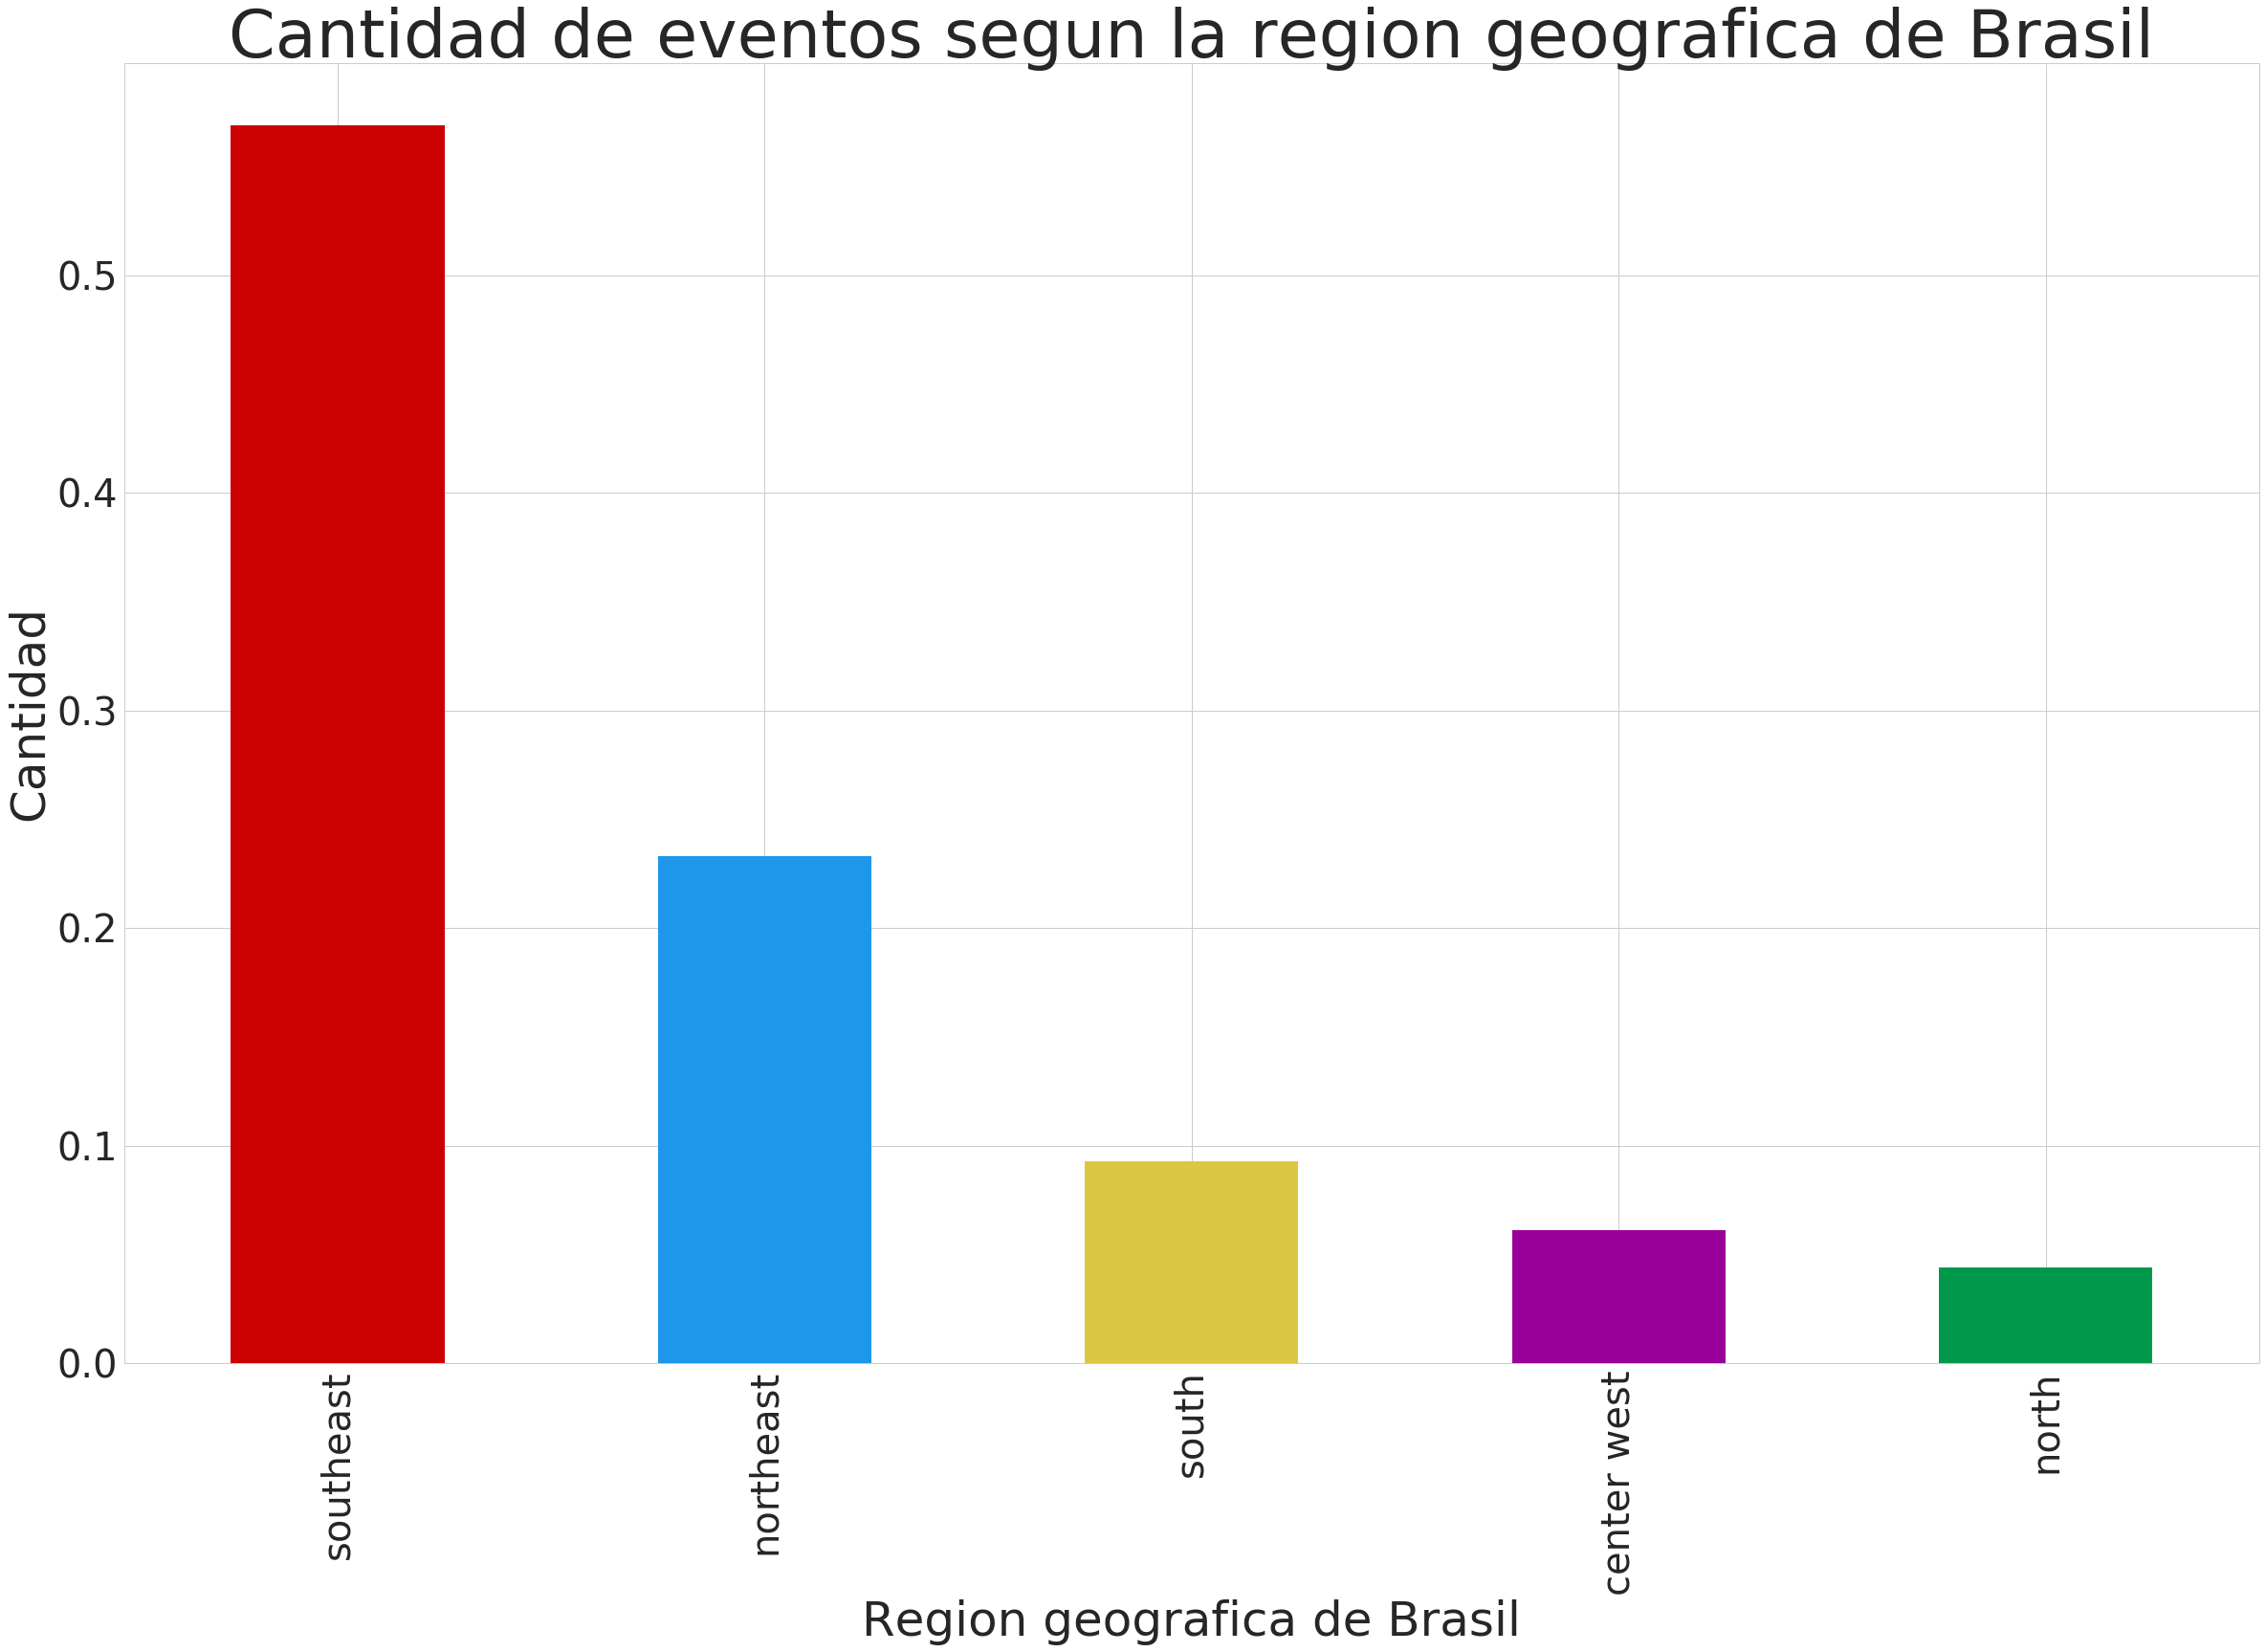

In [38]:
bar_geo_regions_plot = geo_region.plot.bar(figsize=(40, 25), fontsize=40, color=['#CC0000', '#1D97E9', '#DBC742', '#990099', '#00994C'])
bar_geo_regions_plot.set_title("Cantidad de eventos segun la region geografica de Brasil", fontsize=70)
bar_geo_regions_plot.set_xlabel("Region geografica de Brasil", fontsize=50)
bar_geo_regions_plot.set_ylabel("Cantidad", fontsize=50)
bar_geo_regions_plot.get_figure().savefig('visited_per_geo_region')

In [39]:
# Distintos tipos de dispositivos
visited_site_brazil['device_type'].value_counts()

Smartphone    42775
Computer      40239
Tablet         1180
Unknown         114
Name: device_type, dtype: int64

In [40]:
def reduceColumnLevel(df):
    l0 = df.columns.get_level_values(0)
    l1 = df.columns.get_level_values(1)
    df.columns = l0 + '_' + l1
    return df

In [41]:
visited_site_brazil_computer_or_smarthpone = visited_site_brazil.loc[(visited_site_brazil['device_type'] == 'Computer') | (visited_site_brazil['device_type'] == 'Smartphone')]

In [42]:
new_per_dispositive = visited_site_brazil_computer_or_smarthpone.loc[visited_site_brazil_computer_or_smarthpone['new_vs_returning'] == 'New']

Text(0,0.5,'Cantidad')

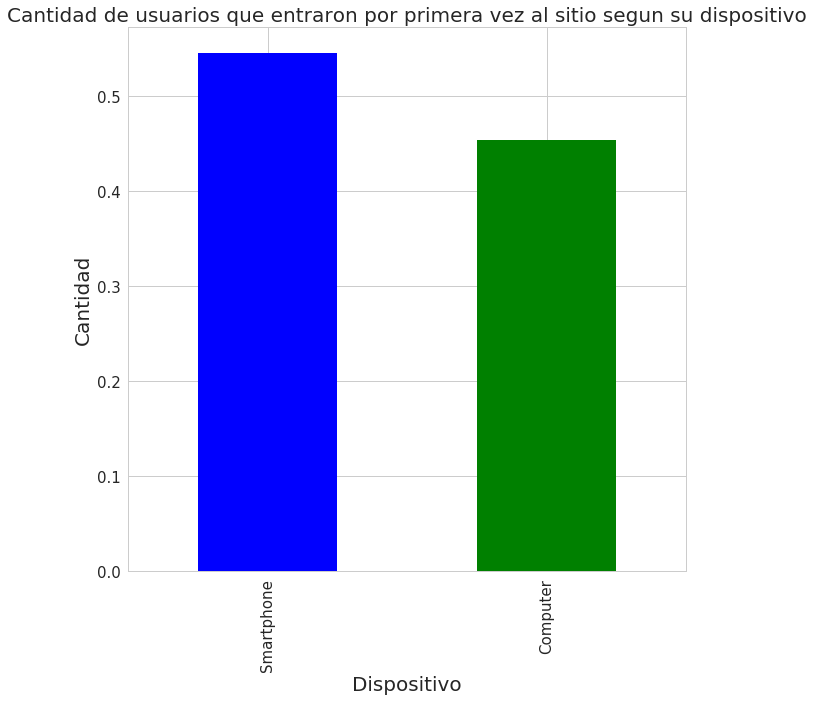

In [43]:
count_new_dispositive = new_per_dispositive['device_type'].value_counts(normalize=True)
plot_count_new_dispositive = count_new_dispositive.plot.bar(figsize=(10, 10), fontsize=15, color=['b', 'g'])
plot_count_new_dispositive.set_title("Cantidad de usuarios que entraron por primera vez al sitio segun su dispositivo", fontsize=20)
plot_count_new_dispositive.set_xlabel("Dispositivo", fontsize=20)
plot_count_new_dispositive.set_ylabel("Cantidad", fontsize=20)

In [44]:
returning_per_dispositive = visited_site_brazil_computer_or_smarthpone.loc[visited_site_brazil_computer_or_smarthpone['new_vs_returning'] == 'Returning']

Text(0,0.5,'Cantidad')

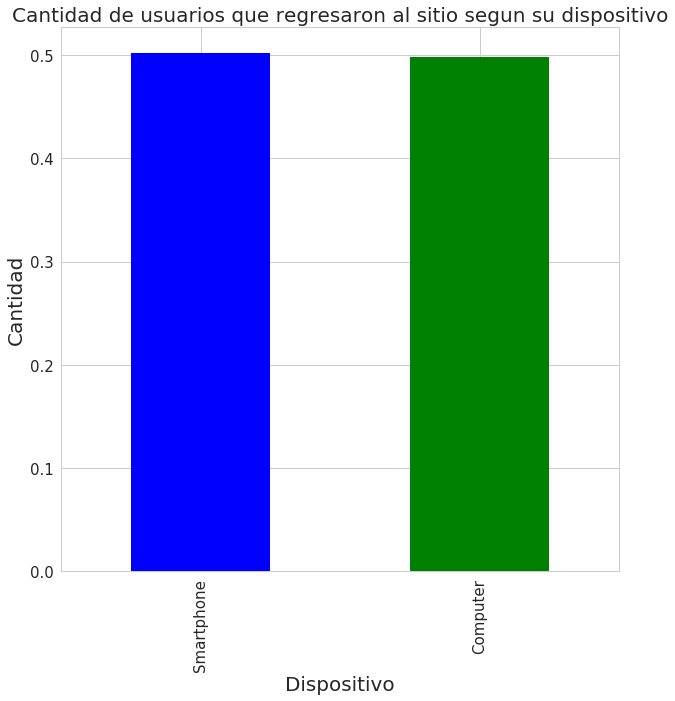

In [45]:
returning_per_dispositive['device_type'].value_counts(normalize=True)
count_ret_dispositive = returning_per_dispositive['device_type'].value_counts(normalize=True)
plot_count_ret_dispositive = count_ret_dispositive.plot.bar(figsize=(10, 10), fontsize=15, color=['b', 'g'])
plot_count_ret_dispositive.set_title("Cantidad de usuarios que regresaron al sitio segun su dispositivo", fontsize=20)
plot_count_ret_dispositive.set_xlabel("Dispositivo", fontsize=20)
plot_count_ret_dispositive.set_ylabel("Cantidad", fontsize=20)

In [46]:
devices_per_region = visited_site_brazil_computer_or_smarthpone.groupby(['geo_region', 'device_type']).agg({'event': ['count']})
devices_per_region.head(20)

event
                         count
geo_region  device_type       
center west Computer      2526
            Smartphone    1828
north       Computer      1632
            Smartphone    1476
northeast   Computer      7766
            Smartphone    8619
south       Computer      3737
            Smartphone    2857
southeast   Computer     18884
            Smartphone   21386

In [47]:
devices_per_region = reduceColumnLevel(devices_per_region)
devices_per_region.head(20)

event_count
geo_region  device_type             
center west Computer            2526
            Smartphone          1828
north       Computer            1632
            Smartphone          1476
northeast   Computer            7766
            Smartphone          8619
south       Computer            3737
            Smartphone          2857
southeast   Computer           18884
            Smartphone         21386

In [48]:
devices_per_region.unstack()

event_count           
device_type    Computer Smartphone
geo_region                        
center west        2526       1828
north              1632       1476
northeast          7766       8619
south              3737       2857
southeast         18884      21386

In [49]:
devices_per_region_pivot = devices_per_region.pivot_table(index='geo_region', columns='device_type', values='event_count')
devices_per_region_pivot = devices_per_region_pivot.sort_values(by='Computer', ascending=False)
devices_per_region_pivot

device_type,Computer,Smartphone
geo_region,,
southeast,18884,21386
northeast,7766,8619
south,3737,2857
center west,2526,1828
north,1632,1476


Text(0,0.5,'Cantidad de accesos')

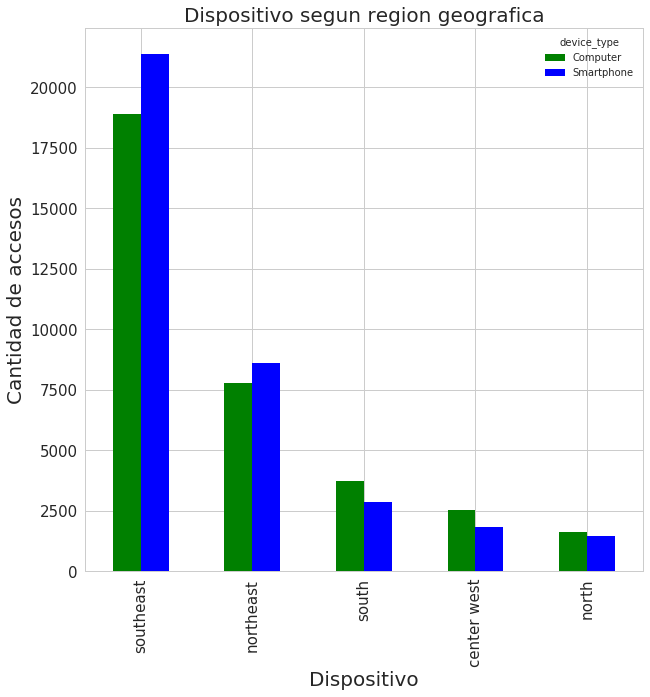

In [50]:
plot_devices_per_geo_region = devices_per_region_pivot.plot.bar(
    figsize=(10, 10), 
    fontsize=15,
    color=['g', 'b']
)
plot_devices_per_geo_region.set_title("Dispositivo segun region geografica", fontsize=20)
plot_devices_per_geo_region.set_xlabel("Dispositivo", fontsize=20)
plot_devices_per_geo_region.set_ylabel("Cantidad de accesos", fontsize=20)

In [51]:
def filterVisitedSitesByGeoRegion(df, region):
    return df.loc[df['geo_region'] == region]

In [52]:
def getWeekendVisites(df):
    return df.loc[df['is_weekend'] == True]

In [53]:
def getWeekdaysVisites(df):
    return df.loc[df['is_weekend'] == False]

In [54]:
# Accesos de los dispositivos segun la hora del dia en fin de semanas
tmp = visited_site_brazil_computer_or_smarthpone
visited_site_not_weekend = getWeekdaysVisites(tmp)
visited_site_weekend = getWeekendVisites(tmp)
devices_per_hour_on_weekend = visited_site_weekend.groupby(['hour', 'device_type']).agg({'event': ['count']})
devices_per_hour_on_weekend.head(10)

event
                 count
hour device_type      
0    Computer      474
     Smartphone    735
1    Computer      430
     Smartphone    667
2    Computer      380
     Smartphone    532
3    Computer      250
     Smartphone    346
4    Computer      120
     Smartphone    227

In [55]:
devices_per_hour_not_weekend = visited_site_not_weekend.groupby(['hour', 'device_type']).agg({'event': ['count']})
devices_per_hour_not_weekend.head(0)
# devices_per_hour_not_weekend.index

,,event
,,count
hour,device_type,


In [56]:
def plotEventCountByDevicePerHour(df, figsize=(8,8), fontsize=20):
    l0 = df.columns.get_level_values(0)
    l1 = df.columns.get_level_values(1)
    df.columns = l0 + '_' + l1
    unstacked = df.unstack()
    l0 = unstacked.columns.get_level_values(0)
    l1 = unstacked.columns.get_level_values(1)
    unstacked.columns = l0 + '_' + l1
    df_new = pd.DataFrame({
        'Computer': unstacked['event_count_Computer'],
        'Smartphone': unstacked['event_count_Smartphone'],
        }, 
        index=unstacked.index)
    plot = df_new.plot.line(figsize=figsize, fontsize=fontsize, color=['g', 'b'])
    # plot.legend(prop={'size': 5})
    return plot

devices_per_hour_not_weekend.head()

event
                 count
hour device_type      
0    Computer     1575
     Smartphone   2171
1    Computer     1410
     Smartphone   2125
2    Computer     1096

Text(0.5,1,'Cantidad de visitas segun el dispositivo en cada hora del dia (lunes a viernes)')

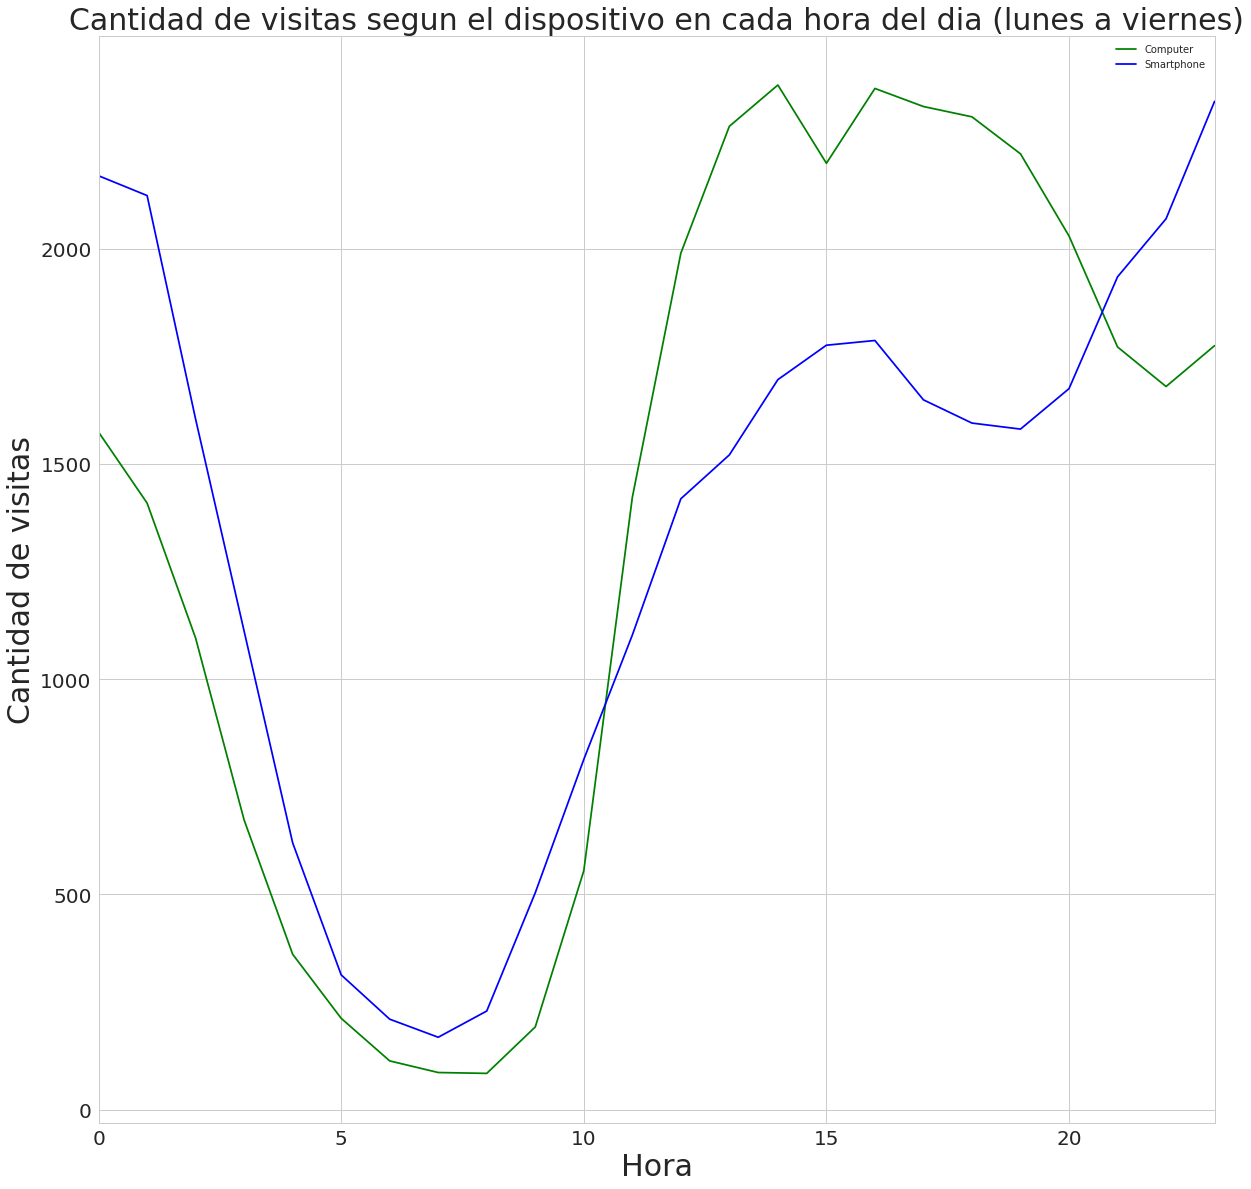

In [57]:
plot_on_weekdays = plotEventCountByDevicePerHour(devices_per_hour_not_weekend, figsize=(20,20))
plot_on_weekdays.set_xlim(0, 23)
plot_on_weekdays.set_xlabel('Hora', fontsize=30)
plot_on_weekdays.set_ylabel('Cantidad de visitas', fontsize=30)
plot_on_weekdays.set_title('Cantidad de visitas segun el dispositivo en cada hora del dia (lunes a viernes)', fontsize=30)

Text(0.5,1,'Cantidad de visitas segun el dispositivo en cada hora del dia (fin de semana)')

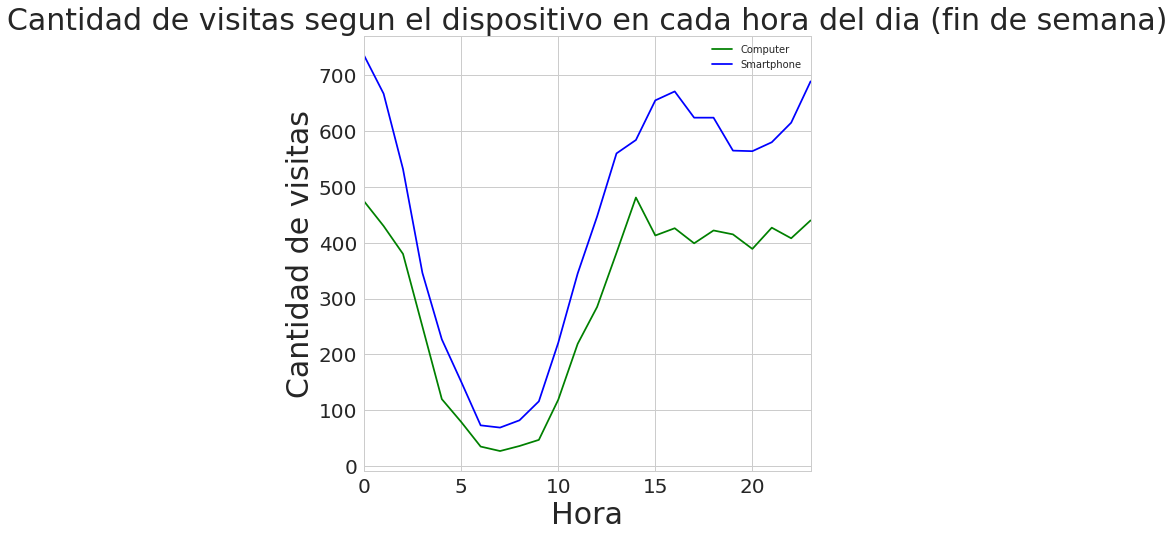

In [58]:
plot_on_weekend = plotEventCountByDevicePerHour(devices_per_hour_on_weekend)
plot_on_weekend.set_xlim(0, 23)
plot_on_weekend.set_xlabel('Hora', fontsize=30)
plot_on_weekend.set_ylabel('Cantidad de visitas', fontsize=30)
plot_on_weekend.set_title('Cantidad de visitas segun el dispositivo en cada hora del dia (fin de semana)', fontsize=30)

# Analisis de visitas segun horario particularizando en region
Ahora analizaremos las visitas segun el horario para los distintas regiones geograficas que se definieron previamente.

```
                        event_count
geo_region	device_type	

center west	Computer	2526
            Smartphone	1828
            
north	    Computer	1632
            Smartphone	1476
            
northeast	Computer	7766
            Smartphone	8619
            
south	    Computer	3737
            Smartphone	2857
            
southeast	Computer	18884
            Smartphone	21386
```

In [59]:
tmp = visited_site_brazil_computer_or_smarthpone

center_west = filterVisitedSitesByGeoRegion(tmp, 'center west')
north = filterVisitedSitesByGeoRegion(tmp, 'north')
northeast = filterVisitedSitesByGeoRegion(tmp, 'northeast')
south = filterVisitedSitesByGeoRegion(tmp, 'south')
southeast = filterVisitedSitesByGeoRegion(tmp, 'southeast')

# Filtamos por dia de seamana y fin de semana
center_west_weekdays = getWeekdaysVisites(center_west)
center_west_weekend = getWeekendVisites(center_west)

north_weekdays = getWeekdaysVisites(north)
north_weekend = getWeekendVisites(north)

northeast_weekdays = getWeekdaysVisites(northeast)
northeast_weekend = getWeekendVisites(northeast)

south_weekdays = getWeekdaysVisites(center_west)
south_weekend = getWeekendVisites(center_west)

southeast_weekdays = getWeekdaysVisites(southeast)
southeast_weekend = getWeekendVisites(southeast)

# Agrupamos
cw_group_wd = center_west_weekdays.groupby(['hour', 'device_type']).agg({'event': ['count']})
cw_group_we = center_west_weekend.groupby(['hour', 'device_type']).agg({'event': ['count']})

n_group_wd = north_weekdays.groupby(['hour', 'device_type']).agg({'event': ['count']})
n_group_we = north_weekend.groupby(['hour', 'device_type']).agg({'event': ['count']})

ne_group_wd = northeast_weekdays.groupby(['hour', 'device_type']).agg({'event': ['count']})
ne_group_we = northeast_weekend.groupby(['hour', 'device_type']).agg({'event': ['count']})

s_group_wd = south_weekdays.groupby(['hour', 'device_type']).agg({'event': ['count']})
s_group_we = south_weekend.groupby(['hour', 'device_type']).agg({'event': ['count']})

se_group_wd = southeast_weekdays.groupby(['hour', 'device_type']).agg({'event': ['count']})
se_group_we = southeast_weekend.groupby(['hour', 'device_type']).agg({'event': ['count']})



Text(0.5,1,'Fin de semana en el centro oeste')

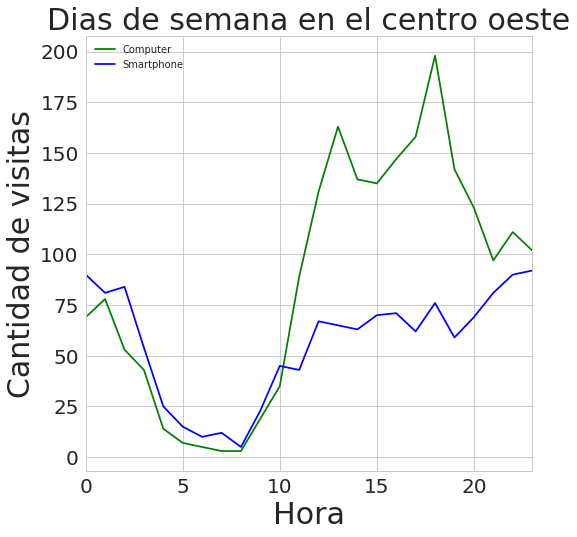

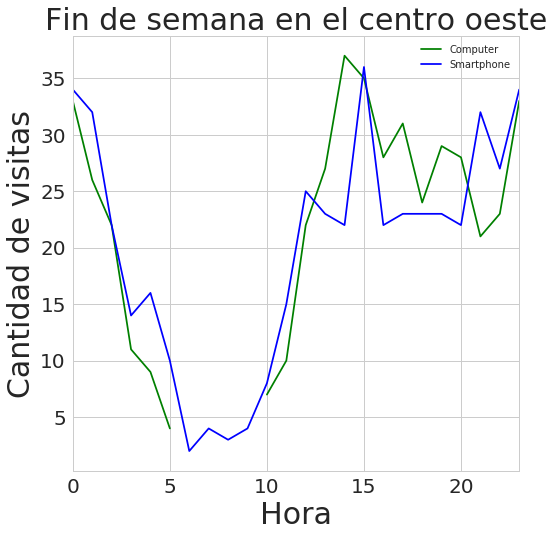

In [60]:
# Plot center west
p_cw_wd = plotEventCountByDevicePerHour(cw_group_wd)
p_cw_wd.set_xlim(0,23)
p_cw_wd.set_xlabel('Hora', fontsize=30)
p_cw_wd.set_ylabel('Cantidad de visitas', fontsize=30)
p_cw_wd.set_title('Dias de semana en el centro oeste', fontsize=30)

p_cw_we = plotEventCountByDevicePerHour(cw_group_we)
p_cw_we.set_xlim(0,23)
p_cw_we.set_xlabel('Hora', fontsize=30)
p_cw_we.set_ylabel('Cantidad de visitas', fontsize=30)
p_cw_we.set_title('Fin de semana en el centro oeste', fontsize=30)

Text(0.5,1,'Fin de semana en el norte')

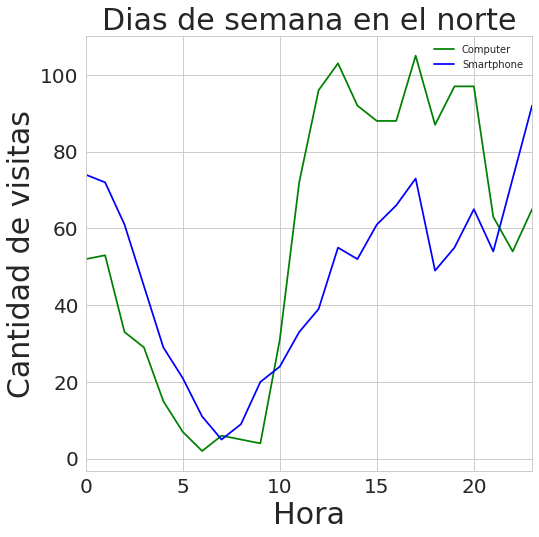

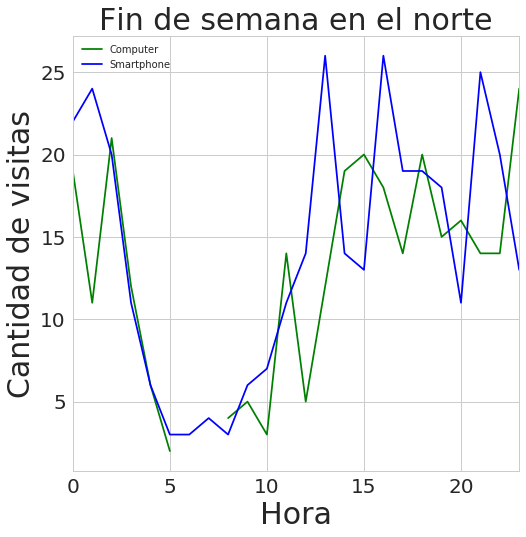

In [61]:
# Plot north
p_n_wd = plotEventCountByDevicePerHour(n_group_wd)
p_n_wd.set_xlim(0,23)
p_n_wd.set_xlabel('Hora', fontsize=30)
p_n_wd.set_ylabel('Cantidad de visitas', fontsize=30)
p_n_wd.set_title('Dias de semana en el norte', fontsize=30)

p_n_we = plotEventCountByDevicePerHour(n_group_we)
p_n_we.set_xlim(0,23)
p_n_we.set_xlabel('Hora', fontsize=30)
p_n_we.set_ylabel('Cantidad de visitas', fontsize=30)
p_n_we.set_title('Fin de semana en el norte', fontsize=30)

Text(0.5,1,'Fin de semana en el noreste')

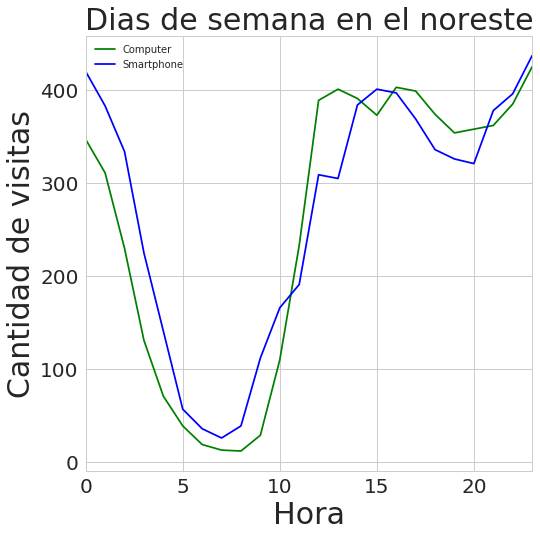

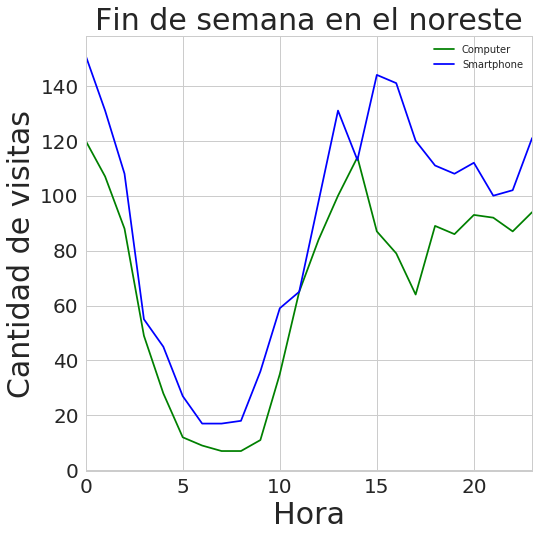

In [62]:
# Plot northeast
p_ne_wd = plotEventCountByDevicePerHour(ne_group_wd)
p_ne_wd.set_xlim(0,23)
p_ne_wd.set_xlabel('Hora', fontsize=30)
p_ne_wd.set_ylabel('Cantidad de visitas', fontsize=30)
p_ne_wd.set_title('Dias de semana en el noreste', fontsize=30)

p_ne_we = plotEventCountByDevicePerHour(ne_group_we)
p_ne_we.set_xlim(0,23)
p_ne_we.set_xlabel('Hora', fontsize=30)
p_ne_we.set_ylabel('Cantidad de visitas', fontsize=30)
p_ne_we.set_title('Fin de semana en el noreste', fontsize=30)

Text(0.5,1,'Fin de semana en el sur')

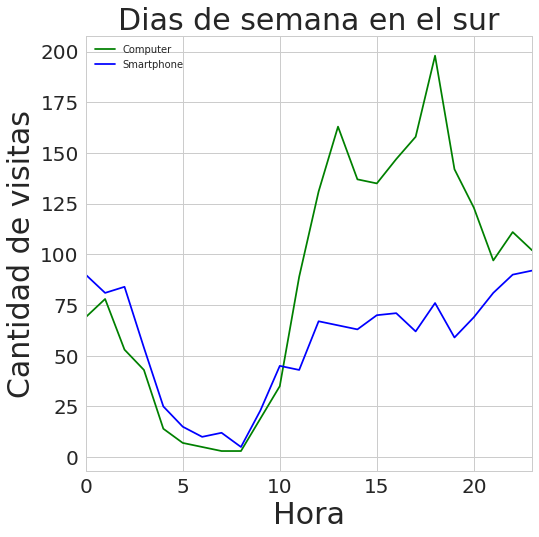

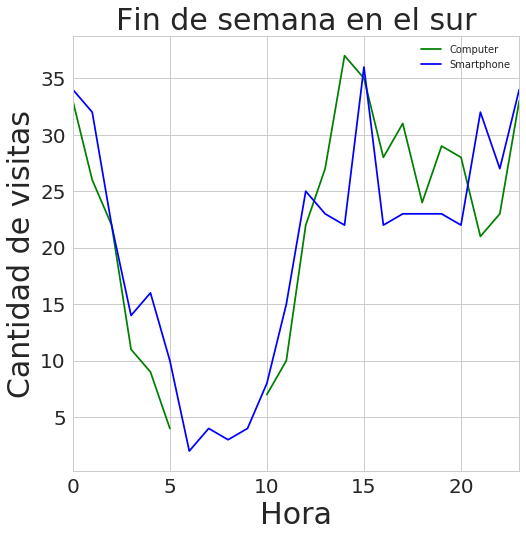

In [63]:
# Plot south
p_s_wd = plotEventCountByDevicePerHour(s_group_wd)
p_s_wd.set_xlim(0,23)
p_s_wd.set_xlabel('Hora', fontsize=30)
p_s_wd.set_ylabel('Cantidad de visitas', fontsize=30)
p_s_wd.set_title('Dias de semana en el sur', fontsize=30)

p_s_we = plotEventCountByDevicePerHour(s_group_we)
p_s_we.set_xlim(0,23)
p_s_we.set_xlabel('Hora', fontsize=30)
p_s_we.set_ylabel('Cantidad de visitas', fontsize=30)
p_s_we.set_title('Fin de semana en el sur', fontsize=30)

Text(0.5,1,'Fin de semana en el sureste')

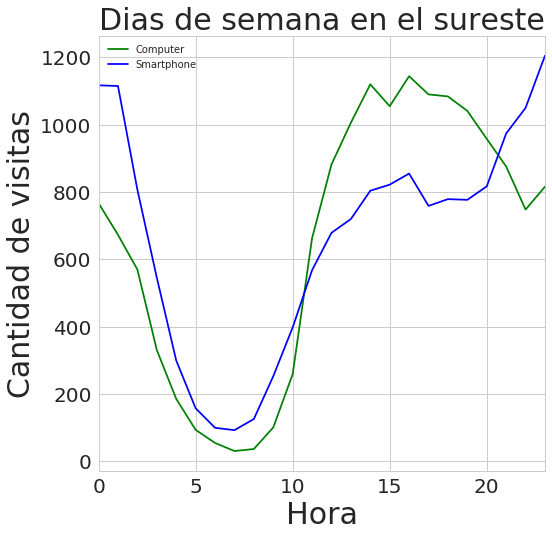

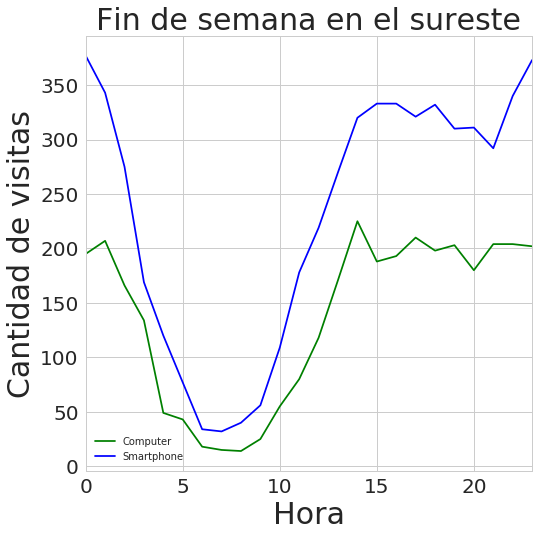

In [64]:
# Plot southeast
p_se_wd = plotEventCountByDevicePerHour(se_group_wd)
p_se_wd.set_xlim(0,23)
p_se_wd.set_xlabel('Hora', fontsize=30)
p_se_wd.set_ylabel('Cantidad de visitas', fontsize=30)
p_se_wd.set_title('Dias de semana en el sureste', fontsize=30)

p_se_we = plotEventCountByDevicePerHour(se_group_we)
p_se_we.set_xlim(0,23)
p_se_we.set_xlabel('Hora', fontsize=30)
p_se_we.set_ylabel('Cantidad de visitas', fontsize=30)
p_se_we.set_title('Fin de semana en el sureste', fontsize=30)

# Análisis del uso de la plataforma por parte de los usuarios

In [65]:
#me quedo con las columnas que me importan
events_short = df.filter(items=['timestamp','event','person','campaign_source','channel','new_vs_returning', 'search_engine', 'search_term'])

De todos los usuarios que generaron eventos en la plataforma, veamos cuantos son nuevos y cuales ya estuvieron anteriormente en la misma

In [66]:
events_short['new_vs_returning'].value_counts()
events_short['month'] = events_short['timestamp'].dt.month

Text(0.5,0,'Usuarios')

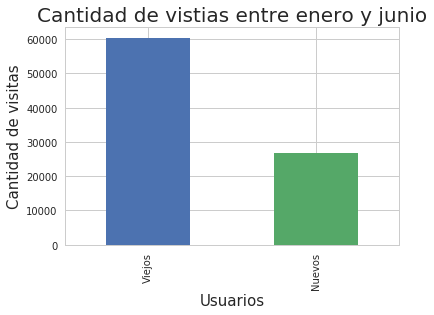

In [67]:
p = events_short['new_vs_returning'].value_counts().plot.bar()
labels = ['Viejos', 'Nuevos']
p.set_xticklabels(labels)
p.set_ylabel('Cantidad de visitas', fontsize= 15)
p.set_title('Cantidad de vistias entre enero y junio', fontsize=20)
p.set_xlabel('Usuarios', fontsize=15)

Como se puede observar la mayoria de los usuarios que usaron la plataforma en los primeros 6 meses del 2018, son usuarios viejos.

#### ¿De que manera llegaron a la plataforma los usuarios nuevos contra los viejos?


In [68]:
#quiero analizar usuarios nuevos de los viejos
#elimino todos las filas en las q not enga esa informacion
new_vs_returning = events_short.dropna(subset=['new_vs_returning'])

In [69]:
new_vs_returning['new_vs_returning'].value_counts()

Returning    60480
New          26898
Name: new_vs_returning, dtype: int64

In [70]:
new_vs_returning['channel'].value_counts()

Paid        44193
Direct      18522
Organic     12348
Referral    11384
Social        846
Email          76
Unknown         9
Name: channel, dtype: int64

In [71]:
#creo dos dataframes nuevos uno con todos los usuarios returning y otro con la data de 
#todos los usuarios nuevos
#g = new_vs_returning.groupby(['month', 'channel']).agg({'new_vs_returning' : 'count'})
new = new_vs_returning.loc[new_vs_returning['new_vs_returning'] == 'New']
returning = new_vs_returning.loc[new_vs_returning['new_vs_returning'] == 'Returning']

In [72]:
#agrupo ambos dataframes por mes y canal
new = new.groupby(['month', 'channel']).agg({'new_vs_returning' : 'count'})
returning = returning.groupby(['month' , 'channel']).agg({'new_vs_returning' : 'count'})

In [73]:
#transformo los canales en columnas
new.unstack()

new_vs_returning                                            \
channel               Direct                Email              Organic   
month                                                                    
1                      51.00                  nan               154.00   
2                      55.00                  nan               109.00   
3                     116.00                 1.00               270.00   
4                     172.00                  nan               440.00   
5                   1,027.00                 7.00             2,581.00   
6                     786.00                 2.00             2,155.00   

                                                                        \
channel                 Paid             Referral               Social   
month                                                                    
1                     287.00                12.00                13.00   
2                     317.00                11.00                 7.00   
3                     670.00                26.00                42.00   
4                     952.00                44.00                19.00   
5                   8,459.00               341.00               188.00   
6                   7,124.00               250.00               209.00   

                              
channel              Unknown  
month                         
1                        nan  
2                        nan  
3                        nan  
4                        nan  
5                       1.00  
6                        nan

In [74]:
returning.unstack()

new_vs_returning                                            \
channel               Direct                Email              Organic   
month                                                                    
1                     567.00                 1.00               198.00   
2                     764.00                 3.00               201.00   
3                   1,745.00                16.00               526.00   
4                   3,376.00                12.00             1,064.00   
5                   7,187.00                28.00             3,189.00   
6                   2,676.00                 6.00             1,461.00   

                                                                        \
channel                 Paid             Referral               Social   
month                                                                    
1                     424.00               390.00                38.00   
2                     879.00               413.00                31.00   
3                   2,684.00             1,069.00                82.00   
4                   4,654.00             1,896.00                20.00   
5                  12,173.00             4,870.00                79.00   
6                   5,570.00             2,062.00               118.00   

                              
channel              Unknown  
month                         
1                        nan  
2                        nan  
3                        nan  
4                       1.00  
5                       7.00  
6                        nan

In [75]:
#hago un pivot de table, transofmrando mes en indice, chanel en columnas y new_vs_returning como valores de ambos indices
new = new.pivot_table(index='month', columns='channel', values='new_vs_returning')
returning = returning.pivot_table(index='month', columns='channel', values='new_vs_returning')

#### Como se puede observar en el siguiente grafico, la mayoria de los usuarios nuevos ingresan al sitio web por canales pagos

Text(0.5,1,'Cantidad de visitas de usuarios nuevos por canal y mes')

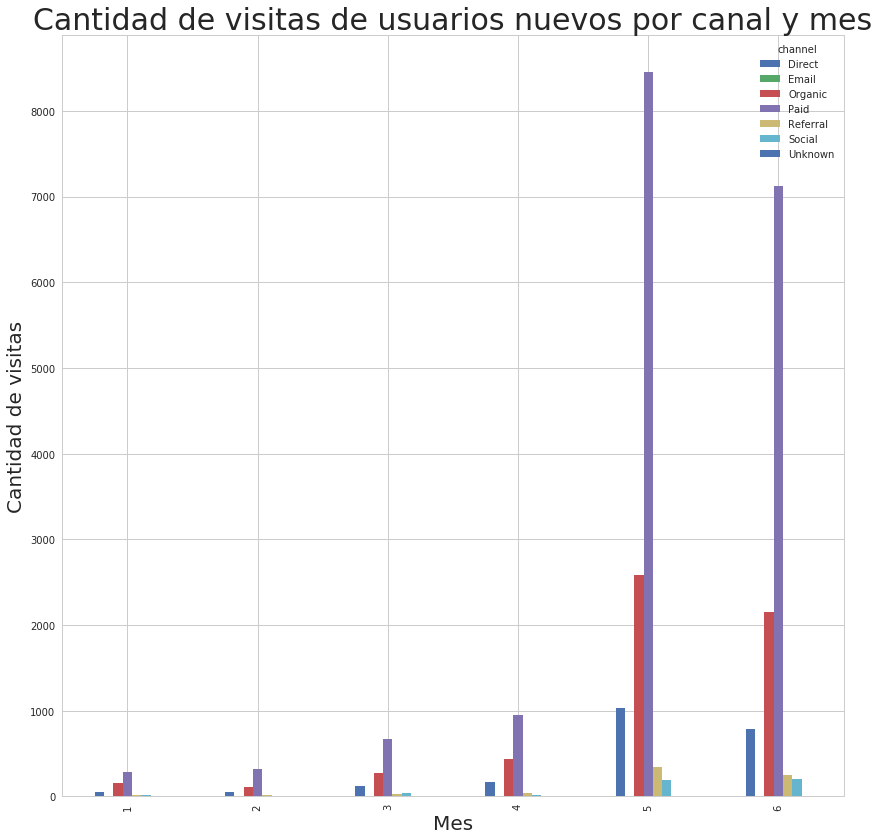

In [76]:
new.drop(columns=['Unknown','Email'])
p = new.plot.bar(figsize=(14,14))
p.set_ylabel('Cantidad de visitas', fontsize=20)
p.set_xlabel('Mes', fontsize=20)
p.set_title('Cantidad de visitas de usuarios nuevos por canal y mes', fontsize=30)

#### Veamos que pasa con los usuarios que vuelven a la plataforma
En el siguiente grafico se observa que el canal pago sigue predominando, pero a diferencia de los usuarios viejos se puede observar que muchos ingresan de forma directa al sitio web, por ende  la primera impresion que hayan tenido sobre el sitio web fue buena e interesante, ya que muchos decidieon volver de forma directa

In [77]:
returning.drop(inplace=True, columns=['Email'])

Text(0.5,1,'Cantidad de visitas de usuarios viejos por canal y mes')

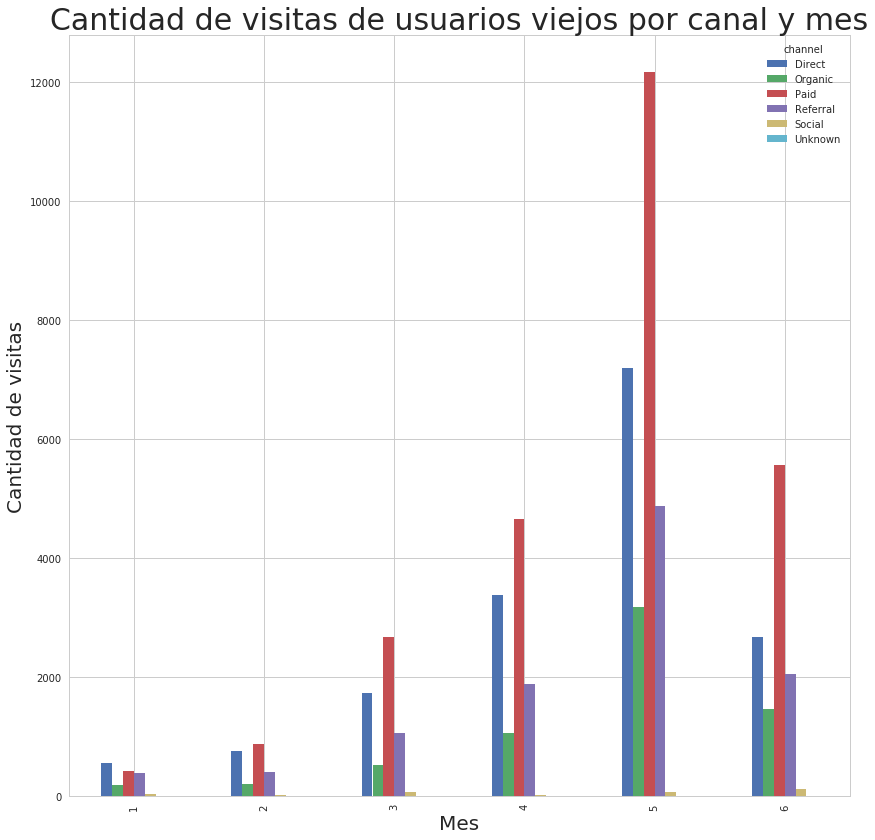

In [78]:
p = returning.plot.bar(figsize=(14,14))
p.set_ylabel('Cantidad de visitas', fontsize=20)
p.set_xlabel('Mes', fontsize=20)
p.set_title('Cantidad de visitas de usuarios viejos por canal y mes', fontsize=30)

In [79]:
total = new_vs_returning.groupby(['channel', 'new_vs_returning']).agg({'person':'count'})

In [80]:
total = total.pivot_table(index='channel', columns='new_vs_returning', values='person')

In [81]:
total.drop(index=['Unknown', 'Email'], inplace=True)

Text(0,0.5,'Cantidad de visitas')

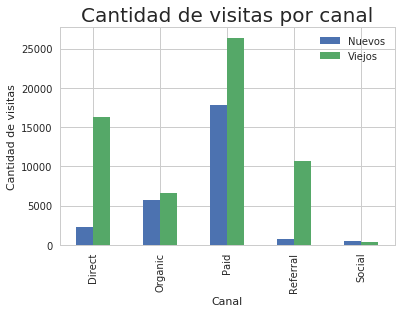

In [82]:
p = total.plot.bar()
p.legend(['Nuevos','Viejos'])
p.set_xlabel('Canal')
p.set_title('Cantidad de visitas por canal', fontsize=20)
p.set_ylabel('Cantidad de visitas')

#### Analicemos la cantidad de conversiones de los usuarios

In [83]:
#me quedo con los eventos de conversiones y checkout
check_conv = events_short.loc[(events_short['event'] == 'conversion') | (events_short['event'] == 'checkout')]
check_conv

,timestamp,event,person,campaign_source,channel,new_vs_returning,search_engine,search_term,month
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,NaN,NaN,NaN,NaN,5
7,2018-05-29 13:29:35,checkout,0006a21a,NaN,NaN,NaN,NaN,NaN,5
44,2018-05-24 11:34:32,checkout,000a54b2,NaN,NaN,NaN,NaN,NaN,5
85,2018-04-06 05:14:58,checkout,00184bf9,NaN,NaN,NaN,NaN,NaN,4
86,2018-04-06 05:18:15,checkout,00184bf9,NaN,NaN,NaN,NaN,NaN,4
94,2018-05-04 18:50:21,checkout,00184bf9,NaN,NaN,NaN,NaN,NaN,5
95,2018-05-17 04:45:15,checkout,00184bf9,NaN,NaN,NaN,NaN,NaN,5
103,2018-05-17 00:11:26,checkout,0019c395,NaN,NaN,NaN,NaN,NaN,5
110,2018-06-08 12:19:50,checkout,001bb7eb,NaN,NaN,NaN,NaN,NaN,6
114,2018-05-29 12:56:27,checkout,001f1653,NaN,NaN,NaN,NaN,NaN,5


In [84]:
check_conv = check_conv.groupby(['month', 'event']).agg({'person' : 'count'})
check_conv

person
month event             
1     checkout       331
      conversion      63
2     checkout       441
      conversion      74
3     checkout      1386
      conversion     265
4     checkout      1965
      conversion     316
5     checkout     15645
      conversion     351
6     checkout     13967
      conversion     103

In [85]:
check_conv = check_conv.pivot_table(index='month', columns='event', values='person')
check_conv

event,checkout,conversion
month,,
1,331,63
2,441,74
3,1386,265
4,1965,316
5,15645,351
6,13967,103


Como se puede observar en el siguiente grafico, la cantidad de checkouts supera ampliamente la cantidad de conversiones por mes.
Tambien se puede ver como en el quinto mes, la cantidad de checkouts se multiplico por ocho sin embargo la cantidad de conversiones no aumentaron proporcionalmente junto con la cantidad de checkouts
¿Por que podria ser esto? ¿Por que aumentaron tanto los checkouts estos dos ultimos meses?

Text(0,0.5,'Cantidad')

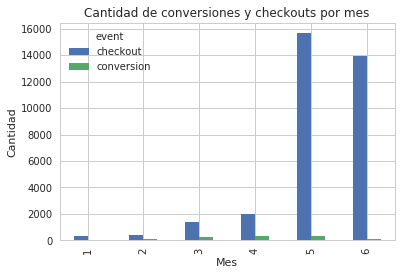

In [86]:
p = check_conv.plot.bar()
p.set_title('Cantidad de conversiones y checkouts por mes')
p.set_xlabel('Mes')
p.set_ylabel('Cantidad')

In [87]:
events_short.head()

,timestamp,event,person,campaign_source,channel,new_vs_returning,search_engine,search_term,month
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,criteo,NaN,NaN,NaN,NaN,5
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,Paid,New,NaN,NaN,5
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,NaN,NaN,NaN,NaN,5
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,NaN,NaN,NaN,NaN,5
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,NaN,NaN,NaN,NaN,5


#### Analizaremos los meses de abril y mayo en el cual se ve este aumento desproporcionado de la cantidad de checkouts

In [88]:
events_may_april = events_short.loc[(events_short['month'] == 5) | (events_short['month'] == 4)]
events_may_april

,timestamp,event,person,campaign_source,channel,new_vs_returning,search_engine,search_term,month
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,criteo,NaN,NaN,NaN,NaN,5
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,Paid,New,NaN,NaN,5
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,NaN,NaN,NaN,NaN,5
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,NaN,NaN,NaN,NaN,5
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,NaN,NaN,NaN,NaN,5
5,2018-05-29 13:29:26,visited site,0006a21a,NaN,Paid,New,NaN,NaN,5
6,2018-05-29 13:29:27,ad campaign hit,0006a21a,criteo,NaN,NaN,NaN,NaN,5
7,2018-05-29 13:29:35,checkout,0006a21a,NaN,NaN,NaN,NaN,NaN,5
8,2018-04-09 20:12:31,generic listing,000a54b2,NaN,NaN,NaN,NaN,NaN,4
9,2018-04-09 20:12:31,visited site,000a54b2,NaN,Paid,New,NaN,NaN,4


In [89]:
grouped = events_may_april.groupby(['month', 'channel']).agg({'event' : 'count'})
grouped = grouped.unstack()
grouped
#grouped = grouped.pivot_table(index='month', columns='channel', values='event')

event                                             
channel Direct Email Organic   Paid Referral Social Unknown
month                                                      
4         3548    12    1504   5606     1940     39       1
5         8214    35    5770  20632     5211    267       8

In [90]:
grouped = grouped.pivot_table(index='month', columns='channel', values='event')

Se puede ver como aumentaron por 4 la cantidad de usuarios pagos, se podria llegar a la conclusion de que los usuarios a pesar de obetenr mayor cantidad de visitas por usuarios pagos, estos raramente haran una conversion

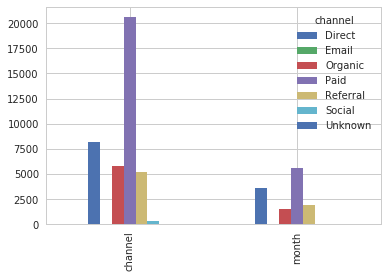

In [91]:
grouped.plot.bar()

#### Intentemos categorizar a todos los usuarios, si son pagos o no pagos y luego de eso veremos cuales realizaorn conversiones y cuales no

In [92]:
events_short['paid'] = np.nan

In [93]:
events_short['paid'] = np.where(events_short['channel'] == 'Paid', True, False)

In [94]:
check_conv = events_short.loc[(events_short['event'] == 'checkout') | (events_short['event'] == 'conversion')]
events_short['paid'].value_counts()

False    967095
True      44193
Name: paid, dtype: int64

In [95]:
events_short['person'].value_counts()

71492f2b    2771
6b07be7b    2770
285101a1    2140
3e34b3cf    1877
2d5a84c1    1800
5f25cb5d    1797
5af7e2bc    1773
3b5a5833    1705
d7e60792    1352
cd6e0b8d    1254
d9251b63    1234
c501ff3a    1201
778fcfbd    1195
a7d3181e    1185
e2b0ce1b    1168
c38d5de3    1162
6d2fe2db    1110
88cabe99    1073
ba102035    1014
ff9dc4b8    1005
b7db0194    1003
a94ab0df     990
e27ec493     978
55d9fd71     973
8e0c69f6     958
63112254     955
d5661793     950
badaab79     930
3444791f     913
9fdfd942     907
            ... 
123db50e       1
d57b091b       1
358f06b1       1
759683a2       1
fd59fd0f       1
f990db86       1
55febfcb       1
2e16f052       1
de6faf75       1
82ee5acf       1
ad1459fa       1
b7ce2d8b       1
b2f89bcb       1
68a62de9       1
c27fc64a       1
b104a53c       1
bfade6aa       1
2eb4efc2       1
4e901fbe       1
d01528a2       1
62637ac6       1
895d26f5       1
a3a1946b       1
1dd807a3       1
34e0e8e8       1
bf8b07aa       1
25887fff       1
574e9726      

#### Creo un nuevo dataframe, que va a estar compuesto por todos los usuarios, que son pagos

In [96]:
paid = events_short.loc[events_short['paid'] == True]

In [97]:
paid['paid'].value_counts()

True    44193
Name: paid, dtype: int64

#### Elimino los usuarios duplicados, ahora tengo un segundo dataframe, con todos los usuarios que alguna vez tuvierno algun evento pago

In [98]:
paid = events_short.drop_duplicates(subset='person')
paid['person'].value_counts()

853bc87f    1
31239355    1
342ca181    1
42a0409a    1
3ccfbfe9    1
afcd4538    1
8f9ebba7    1
22df4524    1
e8aead10    1
da9af611    1
2f2014c7    1
805c97b7    1
b507d7db    1
92cd71f9    1
46f61ab6    1
6fed174b    1
9406aec7    1
b6f8cf1f    1
1fec009a    1
5737cb95    1
8e3da6f3    1
a7ec1b96    1
32642255    1
06d942c8    1
fb8d571a    1
5e0a5a69    1
15543436    1
5997b3f1    1
330b9611    1
163c1ceb    1
           ..
5506c6aa    1
ffa3bc06    1
d87c3584    1
36131b67    1
49f74d25    1
0995e725    1
c3b68145    1
4855ada5    1
3ba9b8c0    1
44e1ac2b    1
69a58dc0    1
e45a3337    1
afbaaada    1
7ecb86a6    1
efeedf28    1
56f81be9    1
016d4e63    1
53cd1c4f    1
49f16aa1    1
cd1aa1f4    1
332c52ec    1
3f829bbe    1
10fa1c7c    1
939a31db    1
118e5ced    1
c82d4391    1
ce8ffc96    1
6852ea9a    1
8725d9fc    1
a9d558d7    1
Name: person, Length: 27624, dtype: int64

#### SI la persona del dataframe de checkouts y conversions esta en el dataframe de los usuarios pagos entonces 'paid' es true

In [99]:
check_conv.loc[check_conv['person'].isin(paid['person']), 'paid'] = True

#### Todos los usuarios en algun momento tuvieorn un evento pago

In [100]:
check_conv['person'].value_counts()

52a4edd3    39
2064597d    32
a0d4baef    31
19b38ba2    30
8ed3287f    28
78f2c20f    26
ee6772b4    25
d38f5851    25
5b9f64aa    24
cca66add    23
4200bdee    23
1a13e375    22
3952fd6f    22
13e22697    22
02d599d3    22
6257f5ae    21
4fd480b4    21
5f0c1d45    21
7608c6e2    21
292b594a    21
2925e132    21
a96e304b    21
48d14aeb    21
07c062bf    21
baa40260    20
4f950ef2    20
b7f832b9    20
3eb8d8c4    20
3b5a5833    20
1072db20    19
            ..
f31a8cf9     1
6636a956     1
ec8350a9     1
09f17271     1
82a77b35     1
404e6c97     1
329dacde     1
2a3f2035     1
2a3649bf     1
4d6ee669     1
0ed0b790     1
0d0b582c     1
b3917748     1
e0407d0d     1
74eb5d48     1
73177271     1
3e2993a0     1
409e601f     1
d86b632b     1
bbd77bc2     1
4bf7b0f5     1
45327526     1
5d393571     1
665714c0     1
b7e609a6     1
21047d76     1
66987a0b     1
11a7fec6     1
bf30f2b4     1
a9d558d7     1
Name: person, Length: 27624, dtype: int64

In [101]:
check_conv['paid'].value_counts()

True    34907
Name: paid, dtype: int64

# ¿Que tan efectivas fueron las campañas de anuncios?

In [102]:
events_short['campaign_source'].value_counts()

google              58153
criteo               9694
rtbhouse             8550
zanox                1673
emblue               1352
FacebookAds           764
afilio                692
bing                  484
voxus                 432
rakuten               310
indexa                154
buscape               141
manifest              126
Facebook               77
datacrush              60
blog                   37
afiliado               34
yotpo                  25
mercadopago            18
FacebookSocial          8
MARKETING SOCIAL        7
onsite                  3
socialmedia             1
Google Social           1
Name: campaign_source, dtype: int64

Text(0,0.5,'Cantidad de visitas')

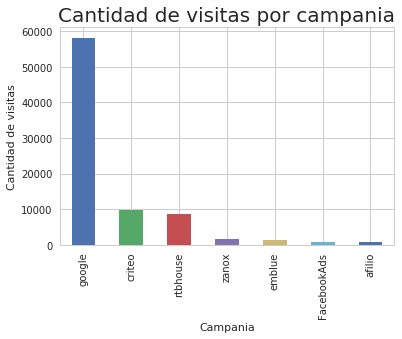

In [103]:
top_7 = events_short['campaign_source'].value_counts().head(7).plot.bar()
top_7.set_title('Cantidad de visitas por campania', fontsize=20)
top_7.set_xlabel('Campania')
top_7.set_ylabel('Cantidad de visitas')

In [104]:
campaign_m = events_short.filter(items=['campaign_source', 'month', 'person'])
campaign_m = campaign_m.groupby(['campaign_source', 'month']).agg({'person':'count'})
campaign_m



person
campaign_source  month        
Facebook         2           2
                 3          12
                 4           6
                 5          38
                 6          19
FacebookAds      1          59
                 2          63
                 3         208
                 4          15
                 5         111
                 6         308
FacebookSocial   1           3
                 5           5
Google Social    6           1
MARKETING SOCIAL 6           7
afiliado         3           8
                 4           5
                 5          14
                 6           7
afilio           1         101
                 2          26
                 3          55
                 4          94
                 5         264
                 6         152
bing             1          16
                 2          11
                 3          52
                 4          53
                 5         255
...                        ...
manifest         1           1
                 3           2
                 4          31
                 5          55
                 6          37
mercadopago      5          10
                 6           8
onsite           2           3
rakuten          4          32
                 5         113
                 6         165
rtbhouse         1         136
                 2         274
                 3         717
                 4        1598
                 5        4122
                 6        1703
socialmedia      1           1
voxus            5         320
                 6         112
yotpo            1           1
                 4           1
                 5          19
                 6           4
zanox            1          70
                 2          62
                 3         157
                 4         252
                 5         737
                 6         395

[100 rows x 1 columns]

In [105]:
campaign_m = campaign_m.pivot_table(index='campaign_source', columns='month', values='person')

In [106]:
campaign_m.sort_values(by=[6], ascending=False, inplace=True)

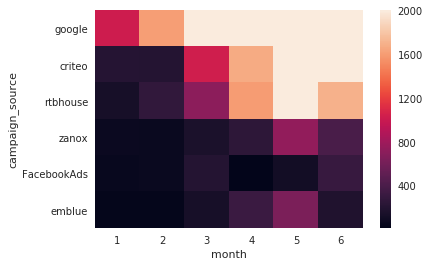

In [107]:
sns.heatmap(campaign_m.head(6), vmax=2000 )

In [108]:
ad_persons = events_short.loc[events_short['event'] == 'ad campaign hit']

In [109]:
ad_persons.sort_values('timestamp', inplace=True)

In [110]:
ad_persons = ad_persons.drop_duplicates(subset=['person'], keep='first')

In [111]:
#events_short.loc[events_short['person'].isin(ad_persons['person']), 'ad_campaign'] = ad_persons['campaign_source']
events_short['ad_campaign'] = events_short['person'].map(ad_persons.set_index('person')['campaign_source'])

In [112]:
events_short

,timestamp,event,person,campaign_source,channel,new_vs_returning,search_engine,search_term,month,paid,ad_campaign
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,criteo,NaN,NaN,NaN,NaN,5,False,criteo
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,Paid,New,NaN,NaN,5,True,criteo
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,NaN,NaN,NaN,NaN,5,False,criteo
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,NaN,NaN,NaN,NaN,5,False,criteo
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,NaN,NaN,NaN,NaN,5,False,criteo
5,2018-05-29 13:29:26,visited site,0006a21a,NaN,Paid,New,NaN,NaN,5,True,criteo
6,2018-05-29 13:29:27,ad campaign hit,0006a21a,criteo,NaN,NaN,NaN,NaN,5,False,criteo
7,2018-05-29 13:29:35,checkout,0006a21a,NaN,NaN,NaN,NaN,NaN,5,False,criteo
8,2018-04-09 20:12:31,generic listing,000a54b2,NaN,NaN,NaN,NaN,NaN,4,False,google
9,2018-04-09 20:12:31,visited site,000a54b2,NaN,Paid,New,NaN,NaN,4,True,google


In [113]:
ad_cc = events_short.loc[(events_short['event'] == 'checkout') | (events_short['event'] == 'conversion')]

In [114]:
ad_cc

,timestamp,event,person,campaign_source,channel,new_vs_returning,search_engine,search_term,month,paid,ad_campaign
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,NaN,NaN,NaN,NaN,5,False,criteo
7,2018-05-29 13:29:35,checkout,0006a21a,NaN,NaN,NaN,NaN,NaN,5,False,criteo
44,2018-05-24 11:34:32,checkout,000a54b2,NaN,NaN,NaN,NaN,NaN,5,False,google
85,2018-04-06 05:14:58,checkout,00184bf9,NaN,NaN,NaN,NaN,NaN,4,False,NaN
86,2018-04-06 05:18:15,checkout,00184bf9,NaN,NaN,NaN,NaN,NaN,4,False,NaN
94,2018-05-04 18:50:21,checkout,00184bf9,NaN,NaN,NaN,NaN,NaN,5,False,NaN
95,2018-05-17 04:45:15,checkout,00184bf9,NaN,NaN,NaN,NaN,NaN,5,False,NaN
103,2018-05-17 00:11:26,checkout,0019c395,NaN,NaN,NaN,NaN,NaN,5,False,google
110,2018-06-08 12:19:50,checkout,001bb7eb,NaN,NaN,NaN,NaN,NaN,6,False,google
114,2018-05-29 12:56:27,checkout,001f1653,NaN,NaN,NaN,NaN,NaN,5,False,criteo


In [115]:
checkouts = ad_cc.loc[ad_cc['event'] == 'checkout']
conversions = ad_cc.loc[ad_cc['event'] == 'conversion']
check_g = checkouts.groupby(['ad_campaign', 'month']).agg({'person':'count'})
conv_g = conversions.groupby(['ad_campaign', 'month']).agg({'person':'count'})
conv_g

person
ad_campaign month        
Facebook    3           1
FacebookAds 1           1
            2           2
            3          19
            4           4
            5           3
afilio      1           4
            2           1
            3           5
            5           4
bing        1           1
            3           4
            4           3
            5           4
blog        4           2
buscape     2           2
            3           3
            4           3
            5           1
criteo      1           4
            2           2
            3          16
            4          37
            5          20
            6           1
emblue      1           1
            2           2
            3           1
            4           4
            5           1
            6           1
google      1          50
            2          59
            3         183
            4         204
            5         194
            6          18
indexa      4           1
            5           1
rakuten     6           1
rtbhouse    2           5
            3          12
            4          14
            5          23
            6           2
voxus       3           2
            5           1
zanox       1           1
            3           9
            4          15
            5           7
            6           3

In [116]:
check_g = check_g.pivot_table(index='ad_campaign', columns='month', values='person')
conv_g = conv_g.pivot_table(index='ad_campaign', columns='month', values='person')
check_g['sum'] = check_g.sum(axis=1)
check_g.sort_values(by='sum', ascending=False, inplace=True)
check_g.drop(columns='sum', inplace=True)

Text(0.5,15,'Mes')

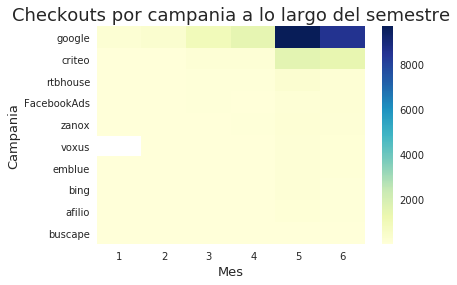

In [117]:
h = sns.heatmap(check_g.head(10), cmap="YlGnBu")
h.set_title('Checkouts por campania a lo largo del semestre', fontsize=18)
h.set_ylabel('Campania', fontsize=13)
h.set_xlabel('Mes', fontsize=13)

Text(0.5,15,'Mes')

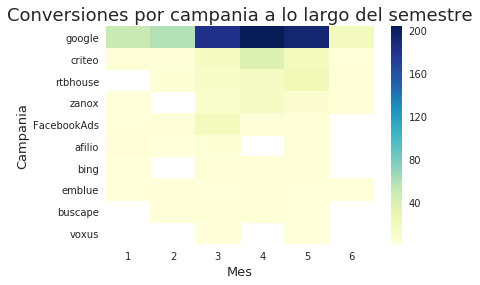

In [118]:
conv_g['sum'] = conv_g.sum(axis=1)
conv_g.sort_values(by='sum', ascending=False, inplace=True)
conv_g.drop(columns='sum', inplace=True)
h = sns.heatmap(conv_g.head(10), cmap="YlGnBu")
h.set_title('Conversiones por campania a lo largo del semestre', fontsize=18)
h.set_ylabel('Campania', fontsize=13)
h.set_xlabel('Mes', fontsize=13)

# Analisis lead y busqueda

In [119]:
df['search_term'].value_counts()

Iphone                                                                                                      1207
Iphone 6                                                                                                    1057
iPhone 6                                                                                                    1005
iphone 6                                                                                                     932
iphone                                                                                                       882
iphone 6s                                                                                                    784
Iphone 6s                                                                                                    736
iPhone 6s                                                                                                    716
Motorola                                                                                        

In [120]:
df['storage'].value_counts()

16GB     190833
32GB     184455
64GB     100024
128GB     40805
8GB       38181
256GB      6821
4GB        2152
512MB       565
Name: storage, dtype: int64

In [121]:
lead = df.loc[df['event'] == 'lead']
lead['model'].value_counts()

iPhone 6 Plus                          35
iPhone 6S Plus                         31
Samsung Galaxy J7 Prime                26
iPhone 6S                              21
Motorola Moto G4 Plus                  20
iPhone 8                               20
Motorola Moto G5 Plus                  15
Samsung Galaxy On 7                    15
Samsung Galaxy A9 Pro 2016             15
iPhone 6                               12
LG K10 Novo                            12
Motorola Moto G5S Plus                  9
iPhone 7 Plus                           9
Samsung Galaxy J7 PRO                   8
Lenovo Vibe A7010 Dual Chip             7
iPhone 8 Plus                           7
LG K10 TV                               6
Motorola Moto G2 3G Dual                5
LG K4                                   5
iPhone 7                                5
Samsung Galaxy Note 5                   5
LG X Power                              5
iPhone SE                               5
Motorola Moto G4 Play DTV         

In [122]:
lead_g = lead.groupby(['model', 'month']).agg({ 'person' : 'count'})
lead_g.sort_values(by='person', inplace=True)
lead_g.unstack()
lead_g = lead_g.pivot_table(index='model', columns='month', values='person')
lead_g

month,1,2,3,4,5,6
model,,,,,,
Asus Zenfone 3 Max 16 GB,nan,nan,nan,1.00,1.00,1.00
Blackberry Blackberry Z30,nan,nan,nan,nan,1.00,nan
LG X Screen,nan,nan,nan,nan,nan,1.00
LG G3 Stylus D690,nan,nan,nan,nan,nan,1.00
LG G4 H815P,nan,nan,nan,1.00,nan,nan
LG G4 H818P,nan,nan,nan,2.00,nan,nan
LG G4 Stylus H630,nan,nan,nan,2.00,nan,1.00
LG G5 SE,nan,1.00,nan,nan,1.00,nan
LG K10,nan,nan,1.00,nan,2.00,1.00


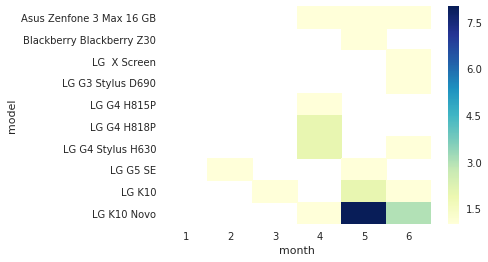

In [123]:
h = sns.heatmap(lead_g.head(10), cmap="YlGnBu")

# Estudio de marcas y dispositivos

In [124]:
marca_filter = df.filter(items=['model'])
marca_filter = marca_filter[marca_filter.model.notnull()]
marca_filter["Cantidad"] = 1
marca_filter = marca_filter.groupby(by='model').agg({'Cantidad': 'sum'})
marca_filter.index
marca_filter = marca_filter.reset_index()
marca_filter.set_index('model', inplace=True)
marca_filter

,Cantidad
model,
Asus Live,4
Asus Zenfone 2,142
Asus Zenfone 2 Deluxe,203
Asus Zenfone 2 Laser,12
Asus Zenfone 3 Max 32 GB,132
Asus Zenfone 3 Max 16 GB,174
Asus Zenfone 3 Zoom,44
Asus Zenfone 5,729
Asus Zenfone 6,590


In [125]:
apple_filter = marca_filter.filter(like='iP', axis=0)
apple_filter = apple_filter.sort_values(by='Cantidad', ascending=False)
apple_filter

,Cantidad
model,
iPhone 6,50916
iPhone 5s,44878
iPhone 6S,39296
iPhone 7,27556
iPhone 7 Plus,18792
iPhone SE,16531
iPhone 6S Plus,12855
iPhone 6 Plus,12766
iPhone 5c,12689


In [126]:
apple_filter.Cantidad.sum()
#Cantidad total de eventos de apple

258499

In [127]:
samsung_filter = marca_filter.filter(like='Samsung', axis=0)
samsung_filter.sort_values(by='Cantidad', ascending=False)

,Cantidad
model,
Samsung Galaxy S7 Edge,23926
Samsung Galaxy S7,19337
Samsung Galaxy S8,16959
Samsung Galaxy J5,13044
Samsung Galaxy S6 Flat,11608
Samsung Galaxy S6 Edge,11175
Samsung Galaxy S8 Plus,10502
Samsung Galaxy J7 Prime,9312
Samsung Galaxy J7,7195


In [128]:
motorola_filter = marca_filter.filter(like='Moto', axis=0)
motorola_filter.sort_values(by='Cantidad', ascending=False)

,Cantidad
model,
Motorola Moto G4 Plus,8080
Motorola Moto X Play 4G Dual,6828
Motorola Moto G3 4G,5156
Motorola Moto X2,5143
Motorola Moto G5,4947
Motorola Moto G5 Plus,4272
Motorola Moto Z Play,3255
Motorola Moto G2 3G Dual,2870
Motorola Moto X Style,2863


In [129]:
asus_filter = marca_filter.filter(like='Asus', axis=0)
asus_filter.sort_values(by='Cantidad', ascending=False)

,Cantidad
model,
Asus Zenfone 5,729
Asus Zenfone 6,590
Asus Zenfone 2 Deluxe,203
Asus Zenfone 3 Max 16 GB,174
Asus Zenfone 2,142
Asus Zenfone 3 Max 32 GB,132
Asus Zenfone Selfie,49
Asus Zenfone 3 Zoom,44
Asus Zenfone 2 Laser,12


In [130]:
lg_filter = marca_filter.filter(like='LG', axis=0)
lg_filter.sort_values(by='Cantidad', ascending=False)

,Cantidad
model,
LG G4 H818P,1306
LG G5 SE,1183
LG G3 D855,1122
LG L Prime D337,941
LG K10 Novo,927
LG K10 TV,900
LG G4 H815P,568
LG Prime Plus H522,468
LG G3 Beat D724,323


In [131]:
black_filter = marca_filter.filter(like='berry', axis=0)
black_filter.sort_values(by='Cantidad', ascending=False).head(10)

,Cantidad
model,
Blackberry Blackberry Z30,1


In [132]:
sony_filter = marca_filter.filter(like='Sony', axis=0)
sony_filter.sort_values(by='Cantidad', ascending=False).head(10)

,Cantidad
model,
Sony Xperia Z3 Plus,1548
Sony Xperia M4 Aqua Dual,1033
Sony Xperia Z3 Dual,910
Sony Xperia Z5,797
Sony Xperia Z2,793
Sony Xperia Z3 TV,714
Sony Xperia Z3 Compact,700
Sony Xperia M4 Aqua,284
Sony Xperia Z5 Premium,144


In [133]:
lenovo_filter = marca_filter.filter(like='Lenovo', axis=0)
lenovo_filter.sort_values(by='Cantidad', ascending=False).head(10)

,Cantidad
model,
Lenovo Vibe K5,2751
Lenovo Vibe A7010 Dual Chip,2028


In [134]:
marcas = pd.DataFrame({'Marca': ["Apple", "Samsumg", "Motorola", "Lenovo", "Sony","LG","Asus", "Blackberry"], 'Cantidad': [apple_filter.Cantidad.sum(), samsung_filter.Cantidad.sum(), motorola_filter.Cantidad.sum(),lenovo_filter.Cantidad.sum(), sony_filter.Cantidad.sum() , lg_filter.Cantidad.sum(), asus_filter.Cantidad.sum(), black_filter.Cantidad.sum()]})
marcas = marcas.sort_values(by='Cantidad', ascending=False)
marcas

,Marca,Cantidad
0,Apple,258499
1,Samsumg,218127
2,Motorola,63518
5,LG,9724
4,Sony,7025
3,Lenovo,4779
6,Asus,2091
7,Blackberry,1


Text(0,0.5,'Cantidad de Eventos')

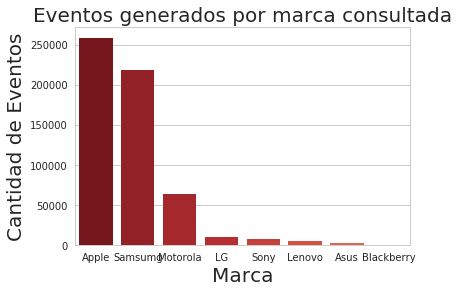

In [135]:
plt.rcParams["axes.labelsize"] = 30
marcas_plot = sns.barplot(x=marcas["Marca"], y=marcas['Cantidad'], orient='v',  palette=sns.color_palette('Reds_r', 15))
marcas_plot.set_title("Eventos generados por marca consultada", fontsize=20)
marcas_plot.set_xlabel("Marca", fontsize=20)
marcas_plot.set_ylabel("Cantidad de Eventos", fontsize=20)

## Cantidad de dispositivos por marca 

In [136]:
apple_filter["Cantidad"] = 1
black_filter["Cantidad"] = 1
lg_filter["Cantidad"] = 1
asus_filter["Cantidad"] = 1
motorola_filter["Cantidad"] = 1
samsung_filter["Cantidad"] = 1
lenovo_filter["Cantidad"] = 1
sony_filter["Cantidad"] = 1

marcas_cantidad_dispositivos = pd.DataFrame({'Marca': ["Apple", "Samsumg", "Motorola", "Lenovo", "Sony","LG","Asus", "Blackberry"], 'Cantidad': [apple_filter.Cantidad.sum(), samsung_filter.Cantidad.sum(), motorola_filter.Cantidad.sum(),lenovo_filter.Cantidad.sum(), sony_filter.Cantidad.sum() , lg_filter.Cantidad.sum(), asus_filter.Cantidad.sum(), black_filter.Cantidad.sum()]})
marcas_cantidad_dispositivos = marcas_cantidad_dispositivos.sort_values(by='Cantidad', ascending=False)
marcas_cantidad_dispositivos

,Marca,Cantidad
1,Samsumg,90
0,Apple,32
2,Motorola,29
5,LG,21
6,Asus,11
4,Sony,10
3,Lenovo,2
7,Blackberry,1


Text(0,0.5,'Cantidad de dispositivos')

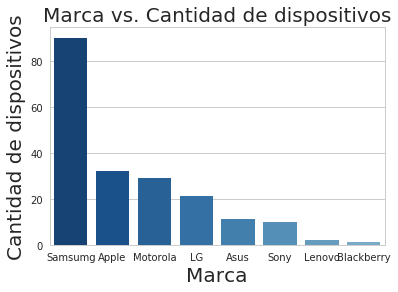

In [137]:
plt.rcParams["axes.labelsize"] = 30
marcas_plot = sns.barplot(x=marcas_cantidad_dispositivos["Marca"], y=marcas_cantidad_dispositivos['Cantidad'], orient='v', palette=sns.color_palette('Blues_r', 15))
marcas_plot.set_title("Marca vs. Cantidad de dispositivos", fontsize=20)
marcas_plot.set_xlabel("Marca", fontsize=20)
marcas_plot.set_ylabel("Cantidad de dispositivos", fontsize=20)

## Conversiones de cada marca

In [138]:
marca_filter = df.filter(items=['model','event'])
marca_filter = marca_filter[marca_filter.model.notnull()]
marca_filter = marca_filter[marca_filter.event == "conversion"]
marca_filter["Cantidad"] = 1
marca_filter = marca_filter.groupby(by='model').agg({'Cantidad': 'sum'})
marca_filter.index
marca_filter = marca_filter.reset_index()
marca_filter.set_index('model', inplace=True)


marca_filter

,Cantidad
model,
Asus Zenfone 3 Max 16 GB,1
Asus Zenfone 5,1
LG G3 D855,6
LG G4 H815P,2
LG G4 H818P,1
LG K10,3
LG K10 Novo,2
LG K10 TV,3
LG L Prime D337,3


In [139]:
apple_filter = marca_filter.filter(like='iP', axis=0)
black_filter = marca_filter.filter(like='berry', axis=0)
lg_filter = marca_filter.filter(like='LG', axis=0)
asus_filter = marca_filter.filter(like='Asus', axis=0)
motorola_filter = marca_filter.filter(like='Moto', axis=0)
samsung_filter = marca_filter.filter(like='Samsung', axis=0)
lenovo_filter = marca_filter.filter(like='Lenovo', axis=0)
sony_filter = marca_filter.filter(like='Sony', axis=0)



In [140]:
marcas_conversiones =  pd.DataFrame({'Marca': ["Apple", "Samsumg", "Motorola", "Lenovo", "Sony","LG","Asus", "Blackberry"], 'Cantidad': [apple_filter.Cantidad.sum(), samsung_filter.Cantidad.sum(), motorola_filter.Cantidad.sum(),lenovo_filter.Cantidad.sum(), sony_filter.Cantidad.sum() , lg_filter.Cantidad.sum(), asus_filter.Cantidad.sum(), black_filter.Cantidad.sum()]})
marcas_conversiones= marcas_conversiones.sort_values(by='Cantidad', ascending=False)
marcas_conversiones

,Marca,Cantidad
1,Samsumg,641
0,Apple,323
2,Motorola,149
4,Sony,23
5,LG,20
3,Lenovo,14
6,Asus,2
7,Blackberry,0


Text(0,0.5,'Cantidad de Conversiones')

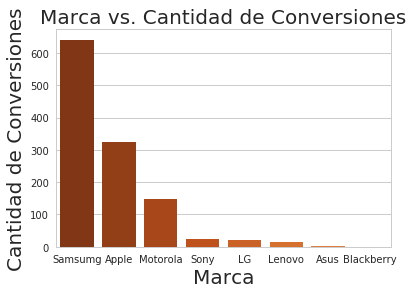

In [141]:
plt.rcParams["axes.labelsize"] = 30
marcas_plot = sns.barplot(x=marcas_conversiones["Marca"], y=marcas_conversiones['Cantidad'], orient='v', palette=sns.color_palette('Oranges_r', 15))
marcas_plot.set_title("Marca vs. Cantidad de Conversiones", fontsize=20)
marcas_plot.set_xlabel("Marca", fontsize=20)
marcas_plot.set_ylabel("Cantidad de Conversiones", fontsize=20)

##  Cantidad de checkout por marca

In [142]:
marca_filter = df.filter(items=['model','event'])
marca_filter = marca_filter[marca_filter.model.notnull()]
marca_filter = marca_filter[marca_filter.event == "checkout"]
marca_filter["Cantidad"] = 1
marca_filter = marca_filter.groupby(by='model').agg({'Cantidad': 'sum'})
marca_filter.index
marca_filter = marca_filter.reset_index()
marca_filter.set_index('model', inplace=True)

In [143]:
apple_filter = marca_filter.filter(like='iP', axis=0)
black_filter = marca_filter.filter(like='berry', axis=0)
lg_filter = marca_filter.filter(like='LG', axis=0)
asus_filter = marca_filter.filter(like='Asus', axis=0)
motorola_filter = marca_filter.filter(like='Moto', axis=0)
samsung_filter = marca_filter.filter(like='Samsung', axis=0)
lenovo_filter = marca_filter.filter(like='Lenovo', axis=0)
sony_filter = marca_filter.filter(like='Sony', axis=0)


In [144]:
marcas_checkout = pd.DataFrame({'Marca': ["Apple", "Samsumg", "Motorola", "Lenovo", "Sony","LG","Asus", "Blackberry"], 'Cantidad': [apple_filter.Cantidad.sum(), samsung_filter.Cantidad.sum(), motorola_filter.Cantidad.sum(),lenovo_filter.Cantidad.sum(), sony_filter.Cantidad.sum() , lg_filter.Cantidad.sum(), asus_filter.Cantidad.sum(), black_filter.Cantidad.sum()]})
marcas_checkout = marcas_checkout.sort_values(by='Cantidad', ascending=False)
marcas_checkout

,Marca,Cantidad
1,Samsumg,14707
0,Apple,14154
2,Motorola,3738
5,LG,562
3,Lenovo,272
4,Sony,218
6,Asus,63
7,Blackberry,0


Text(0,0.5,'Cantidad de Checkout')

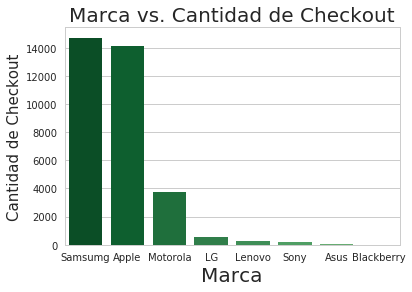

In [145]:
plt.rcParams["axes.labelsize"] = 30
marcas_plot = sns.barplot(x=marcas_checkout["Marca"], y=marcas_checkout['Cantidad'], orient='v', palette=sns.color_palette('Greens_r', 15))
marcas_plot.set_title("Marca vs. Cantidad de Checkout", fontsize=20)
marcas_plot.set_xlabel("Marca", fontsize=20)
marcas_plot.set_ylabel("Cantidad de Checkout", fontsize=15)

## Eventos LEAD

In [146]:
marca_filter = df.filter(items=['model','event'])
marca_filter = marca_filter[marca_filter.model.notnull()]
marca_filter = marca_filter[marca_filter.event == "lead"]
marca_filter["Cantidad"] = 1
marca_filter = marca_filter.groupby(by='model').agg({'Cantidad': 'sum'})
marca_filter.index
marca_filter = marca_filter.reset_index()
marca_filter.set_index('model', inplace=True)


marca_filter

,Cantidad
model,
Asus Zenfone 3 Max 16 GB,3
Blackberry Blackberry Z30,1
LG X Screen,1
LG G3 Stylus D690,1
LG G4 H815P,1
LG G4 H818P,2
LG G4 Stylus H630,3
LG G5 SE,2
LG K10,4


In [147]:
apple_filter = marca_filter.filter(like='iP', axis=0)
black_filter = marca_filter.filter(like='berry', axis=0)
lg_filter = marca_filter.filter(like='LG', axis=0)
asus_filter = marca_filter.filter(like='Asus', axis=0)
motorola_filter = marca_filter.filter(like='Moto', axis=0)
samsung_filter = marca_filter.filter(like='Samsung', axis=0)
lenovo_filter = marca_filter.filter(like='Lenovo', axis=0)
sony_filter = marca_filter.filter(like='Sony', axis=0)

In [148]:
marcas_lead = pd.DataFrame({'Marca': ["Apple", "Samsumg", "Motorola", "Lenovo", "Sony","LG","Asus", "Blackberry"], 'Cantidad': [apple_filter.Cantidad.sum(), samsung_filter.Cantidad.sum(), motorola_filter.Cantidad.sum(),lenovo_filter.Cantidad.sum(), sony_filter.Cantidad.sum() , lg_filter.Cantidad.sum(), asus_filter.Cantidad.sum(), black_filter.Cantidad.sum()]})
marcas_lead = marcas_lead.sort_values(by='Cantidad', ascending=False)
marcas_lead

,Marca,Cantidad
0,Apple,169
1,Samsumg,131
2,Motorola,84
5,LG,44
3,Lenovo,10
6,Asus,3
4,Sony,2
7,Blackberry,1


Text(0,0.5,'Cantidad de Eventos Lead')

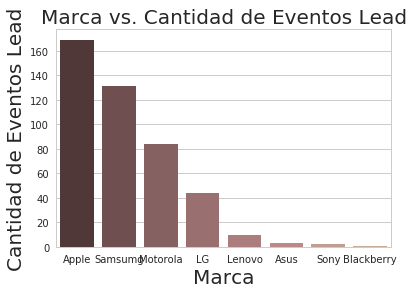

In [149]:
plt.rcParams["axes.labelsize"] = 30
marcas_plot = sns.barplot(x=marcas_lead["Marca"], y=marcas_lead['Cantidad'], orient='v',palette=sns.color_palette('pink', 15))
marcas_plot.set_title("Marca vs. Cantidad de Eventos Lead", fontsize=20)
marcas_plot.set_xlabel("Marca", fontsize=20)
marcas_plot.set_ylabel("Cantidad de Eventos Lead", fontsize=20)

## Comparación eventos conversion vs lead por marca

In [150]:
marcas = marcas_lead

marcas.columns = ["Marca","Cantidad_lead"]
marcas = marcas.join(marcas_conversiones.Cantidad)
marcas.columns = ["Marca","Cantidad_lead", "Cantidad_Conversiones"]
marcas

,Marca,Cantidad_lead,Cantidad_Conversiones
0,Apple,169,323
1,Samsumg,131,641
2,Motorola,84,149
5,LG,44,20
3,Lenovo,10,14
6,Asus,3,2
4,Sony,2,23
7,Blackberry,1,0


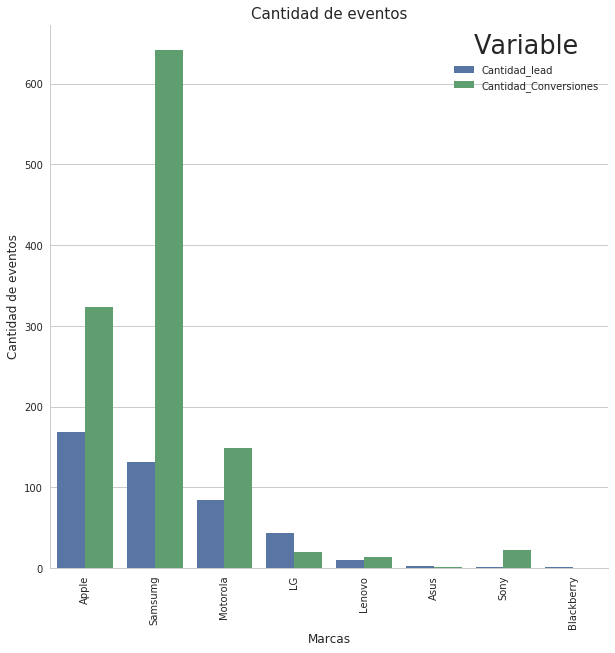

In [151]:
fig, ax1 = plt.subplots(figsize=(10, 10))
tidy = (
    marcas.set_index('Marca')
      .stack()  # un-pivots the data 
      .reset_index()  # moves all data out of the index
      .rename(columns={'level_1': 'Variable', 0: 'Value'})
)
g = sns.barplot(x='Marca', y='Value', hue='Variable', data=tidy, ax=ax1, orient="v")
for item in g.get_xticklabels():
    item.set_rotation(90)

g.set_title("Cantidad de eventos", fontsize=15)
g.set_xlabel("Marcas", fontsize=12)
g.set_ylabel("Cantidad de eventos", fontsize=12)

sns.despine(fig)

### Análisis de los modelos con mas visitas

In [152]:
events_short = df.filter(items=['model','storage','event','sku'])
model_events = events_short[events_short.model.notnull()]
model_events["Cantidad_Eventos"] = 1
model_events = model_events.groupby(['model']).agg({'Cantidad_Eventos':'sum'})
model_events

,Cantidad_Eventos
model,
Asus Live,4
Asus Zenfone 2,142
Asus Zenfone 2 Deluxe,203
Asus Zenfone 2 Laser,12
Asus Zenfone 3 Max 32 GB,132
Asus Zenfone 3 Max 16 GB,174
Asus Zenfone 3 Zoom,44
Asus Zenfone 5,729
Asus Zenfone 6,590


In [153]:
model_events = model_events.sort_values(by='Cantidad_Eventos', ascending=False).head(20)
model_events

,Cantidad_Eventos
model,
iPhone 6,50916
iPhone 5s,44878
iPhone 6S,39296
iPhone 7,27556
Samsung Galaxy S7 Edge,23926
Samsung Galaxy S7,19337
iPhone 7 Plus,18792
Samsung Galaxy S8,16959
iPhone SE,16531


Text(0,0.5,'Modelo')

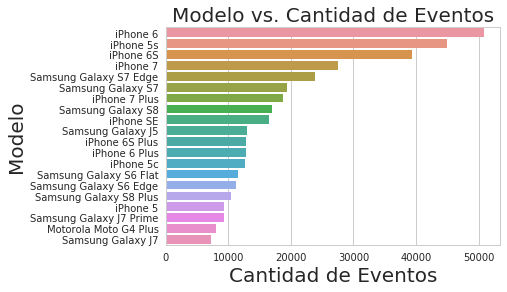

In [154]:
model_events = model_events.reset_index()
plt.rcParams["axes.labelsize"] = 20
model_events_plot = sns.barplot(x=model_events["Cantidad_Eventos"] , y=model_events['model'], orient='h')
model_events_plot.set_title("Modelo vs. Cantidad de Eventos", fontsize=20)
model_events_plot.set_xlabel("Cantidad de Eventos", fontsize=20)
model_events_plot.set_ylabel("Modelo", fontsize=20)

### Cantidad de conversiones por modelo

In [155]:
model_conversion = events_short[events_short.event == "conversion"]
model_conversion["Cantidad_Conv"] = 1
model_conversion = model_conversion.groupby(['model']).agg({'Cantidad_Conv':'sum'})
model_conversion

,Cantidad_Conv
model,
Asus Zenfone 3 Max 16 GB,1
Asus Zenfone 5,1
LG G3 D855,6
LG G4 H815P,2
LG G4 H818P,1
LG K10,3
LG K10 Novo,2
LG K10 TV,3
LG L Prime D337,3


In [156]:
model_conversion = model_conversion.sort_values(by='Cantidad_Conv', ascending=False)
model_conversion = model_conversion.head(20)
model_conversion

,Cantidad_Conv
model,
Samsung Galaxy J5,88
iPhone 5s,84
iPhone 6,71
Samsung Galaxy S6 Flat,39
iPhone 6S,37
iPhone 5c,33
Motorola Moto G4 Plus,30
Motorola Moto G3 4G,30
Samsung Galaxy J7,28


Text(0,0.5,'Modelo')

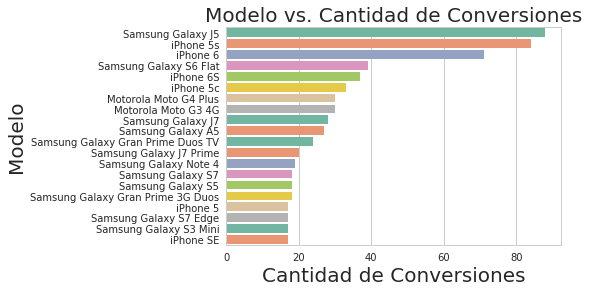

In [157]:
model_conversion = model_conversion.reset_index()
plt.rcParams["axes.labelsize"] = 30
model_conversion_plot = sns.barplot(x=model_conversion["Cantidad_Conv"], y=model_conversion['model'], orient='h',palette=sns.color_palette("Set2", 10))
model_conversion_plot.set_title("Modelo vs. Cantidad de Conversiones", fontsize=20)
model_conversion_plot.set_xlabel("Cantidad de Conversiones", fontsize=20)
model_conversion_plot.set_ylabel("Modelo", fontsize=20)

### Cantidad de checkouts de dispositivos

In [158]:
model_checkout = events_short[events_short.event == "checkout"]
model_checkout["Cantidad_Check"] = 1
model_checkout = model_checkout.groupby(['model']).agg({'Cantidad_Check':'sum'})
model_checkout

,Cantidad_Check
model,
Asus Zenfone 2,4
Asus Zenfone 2 Deluxe,2
Asus Zenfone 3 Max 32 GB,8
Asus Zenfone 3 Max 16 GB,29
Asus Zenfone 3 Zoom,2
Asus Zenfone 5,8
Asus Zenfone 6,7
Asus Zenfone Go,3
LG X Screen,9


In [159]:
model_checkout = model_checkout.sort_values(by='Cantidad_Check', ascending=False).head(20)
model_checkout = model_checkout.reset_index()
model_checkout

,model,Cantidad_Check
0,iPhone 6,3295
1,iPhone 5s,2744
2,iPhone 6S,2308
3,Samsung Galaxy J5,1918
4,Samsung Galaxy S7,1234
5,iPhone 7,1205
6,Samsung Galaxy S8,1074
7,iPhone 7 Plus,924
8,Samsung Galaxy J7 Prime,866
9,Samsung Galaxy S6 Flat,844


Text(0,0.5,'Modelo')

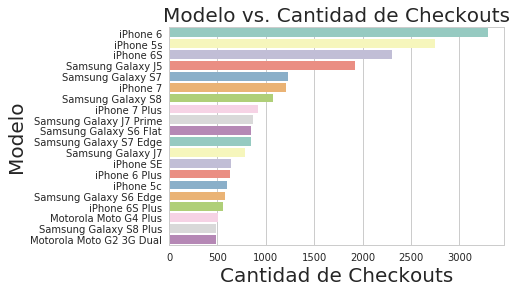

In [160]:
plt.rcParams["axes.labelsize"] = 30
model_checkout_plot = sns.barplot(x=model_checkout["Cantidad_Check"], y=model_checkout['model'], orient='h', palette=sns.color_palette("Set3", 10))
model_checkout_plot.set_title("Modelo vs. Cantidad de Checkouts", fontsize=20)
model_checkout_plot.set_xlabel("Cantidad de Checkouts", fontsize=20)
model_checkout_plot.set_ylabel("Modelo", fontsize=20)